# DSC540 Project 1

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, neighbors, naive_bayes
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You can use more than one cell, if you'd like.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
       

Good Luck!

### Ronaldlee Ejalu

**Honor Pledge:**  
I pledge on my honor that I, **Ronaldlee Ejalu**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [4]:
# Load the dataset from UCI
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [5]:
df.head() # the top 5 records

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Since this dataset does not have headers, we will read the data file that I have created.
- Last column is the target column.
- The ID column is dropped.

In [6]:
df = pd.read_csv('..\\datasets\WisconsinBreastCancer.csv')
X = df.drop('target', axis=1)
y = df.target

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [9]:
X.shape # return a tuple representing the dimensionality of the DataFrame

(569, 30)

569 number of people have cancer.

### Question 2 [5 points]
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [10]:
X.info() # prints the index dtype, columns, non-null values and memory usage information about the X dataframe. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<p>There are no any categorical variables, the variables are made of numeric data type.</p>
<p>There are 569 observations with 30 variables in the feature set X.</p>

In [11]:
X.isnull().sum() # detect the number of missing values in the X dataframe of each variable and sum them up.

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

<p>There are no missing values as derived above and as also shown in the summary information about the feature set X.</p>

### Question 3 [5 points]
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [12]:
X.describe().T # derive the descriptive statistics for the multiple columns at the same time and transpose the result.

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<p>From the descriptive statistics above, there is a large difference when you compare the small values of mean smoothness, mean compactness, mean concavity with the mean area which has larger values.</p>
<p>Worst area has the largest value.</p>
<p>Mean concavity, mean concave points, concavity error, concave points error, worst concavity and worst concave points are the variables with the smallest value of 0.0000.</p>

### Question 4 [5 points]
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

In [13]:
# derive the correlation matrix.
X.corr(method='pearson').round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,0.00,0.16,0.04,-0.09,0.40,0.56,0.45,0.34,0.35,0.69,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


In [14]:
X.columns # get the columns of the X feature set

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [15]:
xcolumns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

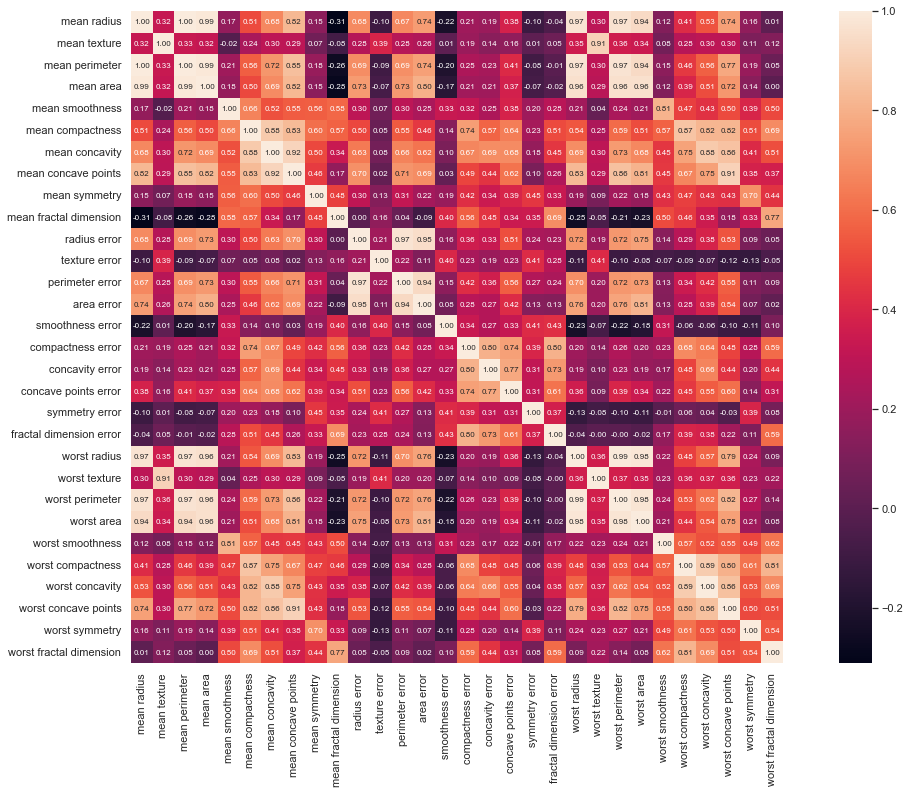

In [16]:
# create a correlation heatmap
corrmat = np.corrcoef(X[xcolumns].values.T) # let's derive a transposed numpy array
# corrmat
sns.set(font_scale=2.0) # set the font
sns.set(rc={'figure.figsize': (20, 12)}) # set figure size
hmap = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=xcolumns, xticklabels=xcolumns)
plt.show()

<ul><b>Mean radius</b> variable is correlated with the following variables:
<li>mean concave points with a high positive correlation of 0.82.</li>
<li>worst concave points with a high positive correlation of 0.74.</li>
<li>area error with a high positive correlation of 0.74.</li>
<li>worst radius with a very high positive correlation of 0.97.</li>
<li>worst perimeter with a very high positive correlation of 0.97.</li>
<li>worst area with a very high positive correlation of 0.94.</li>
</ul>

<p><b>Mean texture</b> variable is very highly correlated with worst texture whose correlation value is 0.91.</p>

<ul><b>Mean perimeter</b> variable is correlated with the following variables:
<li>mean radius with a very high positive correlation value of 1.0.</li>
<li>mean area with a very high positive correlation value of 0.99.</li>
<li>mean concavity with a high positive correlation value of 0.72.</li>
<li>area error with a high positive correlation value of 0.74.</li>
<li>worst radius with a very high positive correlation value of 0.97.</li>
<li>worst perimeter with a very high positive correlation value of 0.97.</li>
<li>worst area with a very high positive correlation value of 0.94.</li>
<li>mean concave points with a high positive correlation value of 0.77.</li>
</ul>

<ul><b>Mean area</b> variable is correlated with the following variables:
<li>mean radius with a very high positive correlation value of 0.99.</li>
<li>mean perimeter with a very high positive correlation value of 0.99.</li>
<li>radius error with a high positive correlation value of 0.73.</li>
<li>perimeter error with a high positive correlation value of 0.73.</li>
<li>worst radius with a very high positive correlation value of 0.96.</li>
<li>worst perimeter with a very high positive correlation value of 0.96.</li>
<li>worst concave points with a high positive correlation value of 0.72.</li>
</ul>

<ul><b>Mean Compactness is correlated with the following variables:</b>
<li>compactness error with a high positive correlation value of 0.74.</li>
<ul>

<ul><b>Mean concavity</b> variable is correlated with the following variables:
<li>mean perimeter with a high positive correlation value of 0.72.</li>
<li>mean concave points with a very high positive correlation value of 0.92.</li>
<li>worst perimeter with a high positive correlation value of 0.73.</li>
<li>worst compactness  with a high positive correlation value of 0.75.</li>
</ul>

<ul><b>Mean concave points</b> variable is correlated with the following variables:
<li>mean concavity with a very high positive correlation value of 0.92.</li>
<li>radius error with a high positive correlation value of 0.70.</li>
<li>perimeter error with a high positive correlation value of 0.71.</li>
<li>worst concavity with a high positive correlation value of 0.75.</li>
<li>mean concave points with a very high positive correlation value of 0.91.</li>
</ul>

<ul><b>Mean symmetry </b>is correlated with the following variables:
<li>worst symmetry with a high positive correlation value of 0.70.</li>
<ul>

<ul><b>Mean fractal dimension </b>is correlated with the following variables:
<li>worst fractal dimension with a high positive correlation value of 0.77.</li>
<ul>

<ul><b>Radius error</b> variable is correlated with the following variables:
<li>mean error with a high positive correlation value of 0.73.</li>
<li>mean concave points with a high positive correlation value of 0.7.</li>
<li>perimeter error with a very high positive correlation value of 0.97.</li>
<li>area error with a very high positive correlation value of 0.95.</li>
<li>worst radius with a high positive correlation value of 0.72.</li>
<li>worst perimeter with a high positive correlation value of 0.72.</li>
<li>worst area with a high positive correlation value of 0.75.</li>
</ul>

<ul><b>Perimeter error</b> variable is correlated with the following variables:
<li>radius error with a very high positive correlation value of 0.97.</li>
<li>mean area with a high positive correlation value of 0.73.</li>
<li>area error with a very high positive correlation value of 0.94.</li>
<li>worst radius with a high positive correlation value of 0.70.</li>
<li>worst perimeter with a high positive correlation value of 0.72.</li>
<li>worst area with a high positive correlation value of 0.73.</li>
<li>mean concave points with a high positive correlation value of 0.71.</li>
</ul>

<ul><b>Area error</b> variable is correlated with the following variables:
<li>mean radius with a high positive correlation value of 0.74.</li>
<li>mean perimeter with a high positive correlation value of 0.74.</li>
<li>perimeter error with a very high positive correlation value of 0.94.</li>
<li>worst radius with a high positive correlation value of 0.75.</li>
<li>worst perimeter with a high positive correlation value of 0.75.</li>
</ul>

<ul><b>Compactness error</b> variable is correlated with the following variables:
<li>mean compactness with a high positive correlation value of 0.74.</li>
<li>concave points error with a high positive correlation value of 0.74.</li>
</ul>

<ul><b>Concavity error</b> variable is correlated with the following variables:
<li>Concave points error with a high positive correlation value of 0.77.</li>
<li>fractal dimension error with a high positive correlation value of 0.73.</li>
</ul>

<ul><b>Concave points error</b> variable is correlated with the following variables:
<li>compactness error with a high positive correlation value of 0.74.</li>
<li>concavity error with a high positive correlation value of 0.77.</li>
</ul>

<ul><b>Fractal dimension error </b>is correlated with the following variables:
<li>concavity error with a high positive correlation value of 0.73.</li>
<ul>

<ul><b>Worst radius</b> variable is correlated with the following variables:
<li>mean radius with a very high positive correlation value of 0.97.</li>
<li>mean perimeter with a very high positive correlation value of 0.97.</li>
<li>mean area with a very high positive correlation value of 0.95.</li>
<li>radius error with a very high positive correlation value of 0.72.</li>
<li>perimeter error with a high positive correlation value of 0.70.</li>
<li>worst area with a very high positive correlation value of 0.95.</li>
<li>worst perimeter with a very very high positive correlation value of 0.99.</li>
<li>worst concave points with a high positive correlation value of 0.79.</li>
</ul>

<ul><b>Worst Perimeter</b> variable is correlated with the following variables:
<li>mean radius with a very high positive correlation value of 0.97.</li>
<li>mean perimeter with a very high positive correlation value of 0.97.</li>
<li>mean area with a very high positive correlation value of 0.95.</li>
<li>mean concavity with a high positive correlation value of 0.73.</li>
<li>radius error with a high positive correlation value of 0.72.</li>
<li>Perimeter error with a high positive correlation value of 0.72.</li>
<li>area error with a high positive correlation value of 0.75.</li>
<li>worst area with a very high positive correlation value of 0.95.</li>
<li>worst radius with a very high positive correlation value of 0.99.</li>
</ul>

<ul><b>Worst area</b> variable is correlated with the following variables:
<li>mean radius with a very high positive correlation value of 0.94.</li>
<li>mean perimeter with a very high positive correlation value of 0.94.</li>
<li>mean area with a very high positive correlation value of 0.95.</li>
<li>radius error with a high positive correlation value of 0.75.</li>
<li>Perimeter error with a high positive correlation value of 0.73.</li>
<li>worst concave points with a high positive correlation value of 0.75.</li>
<li>worst radius with a very high positive correlation value of 0.95.</li>
<li>worst Perimeter with a very high positive correlation value of 0.95.</li>
</ul>

<ul><b>Worst compactness is correlated with the following variables:</b>
<li>mean concavity with a high positive correlation value of 0.75.</li>
<ul>

<ul><b>Worst concavity is correlated with the following variables:</b>
<li>mean concave points with a high positive correlation value of 0.75.</li>
<ul>

<ul><b>Worst concave points</b> variable is correlated with the following variables:
<li>mean radius with a high positive correlation value of 0.74.</li>
<li>mean perimeter with a high positive correlation value of 0.77.</li>
<li>mean area with a high positive correlation value of 0.72.</li>
<li>mean concave points with a very high positive correlation value of 0.91.</li>
<li>worst radius with a high positive correlation value of 0.79.</li>
<li>worst area with a high positive correlation value of 0.75.</li>
</ul>

<ul><b>Worst symmetry is correlated with the following variables:</b>
<li>mean symmetry with a high positive correlation value of 0.70.</li>
<ul>

<ul><b>Worst fractal dimension is correlated with the following variables:</b>
<li>mean fractal dimension with a high positive correlation value of 0.77.</li>
<ul>

### Question 5 [5 points]
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [17]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [18]:
# type of X_train
type(X_train)

pandas.core.frame.DataFrame

In [19]:
# type of X_test
type(X_test)

pandas.core.frame.DataFrame

In [20]:
# type of y_train
type(y_train)

pandas.core.series.Series

In [21]:
# type of y_test
type(y_test)

pandas.core.series.Series

In [22]:
# print some information about the X_train dataframe
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error        

In [23]:
# print some information about the y_train series when converted into a data frame
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


In [24]:
# print some information about the X_test dataframe
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 276 to 112
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              143 non-null    float64
 1   mean texture             143 non-null    float64
 2   mean perimeter           143 non-null    float64
 3   mean area                143 non-null    float64
 4   mean smoothness          143 non-null    float64
 5   mean compactness         143 non-null    float64
 6   mean concavity           143 non-null    float64
 7   mean concave points      143 non-null    float64
 8   mean symmetry            143 non-null    float64
 9   mean fractal dimension   143 non-null    float64
 10  radius error             143 non-null    float64
 11  texture error            143 non-null    float64
 12  perimeter error          143 non-null    float64
 13  area error               143 non-null    float64
 14  smoothness error        

In [25]:
# print some information about the y_test series when converted into a data frame
pd.DataFrame(y_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 276 to 112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  143 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<p>The train set, y_train , has 426 entries after splitting.</p>
<p>The test set, y_test , has 143 entries after splitting.</p>
<p>Stratified sampling uses different observations of the data set as a strata, which represents a more representative sample than a simple random sample without replacement from the entire data set that may  not be representative.Furthermore, stratified sampling increases the effeciency of the estimates by forming strata in such away that each stratum becomes homogeneous with the respect to the characteristics under study.</p>

### Question 6 [10 points]

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [28]:
# let's fit the classifier on the data
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [29]:
# output the classifier's prediction on the training set
pred_train = clf.predict(X_train)
# pred

# derive the training accuracy classification score  
metrics.accuracy_score(y_true = y_train, y_pred = pred_train)

0.9413145539906104

In [30]:
# the same training accuracy score for the training set can be computed by 
# comparing the actual values (y_train) with the predicted values (pred_train) as below :
(y_train == pred_train).mean()

0.9413145539906104

In [31]:
# output the classifiers prediction on testing set.
pred_test = clf.predict(X_test)

# derive the testing accuracy classification score 
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.986013986013986

In [32]:
# the same testing accuracy score for the testing set can be computed by 
# comparing the actual values (y_test) with the predicted values (pred_test) as below :
(y_test == pred_test).mean()

0.986013986013986

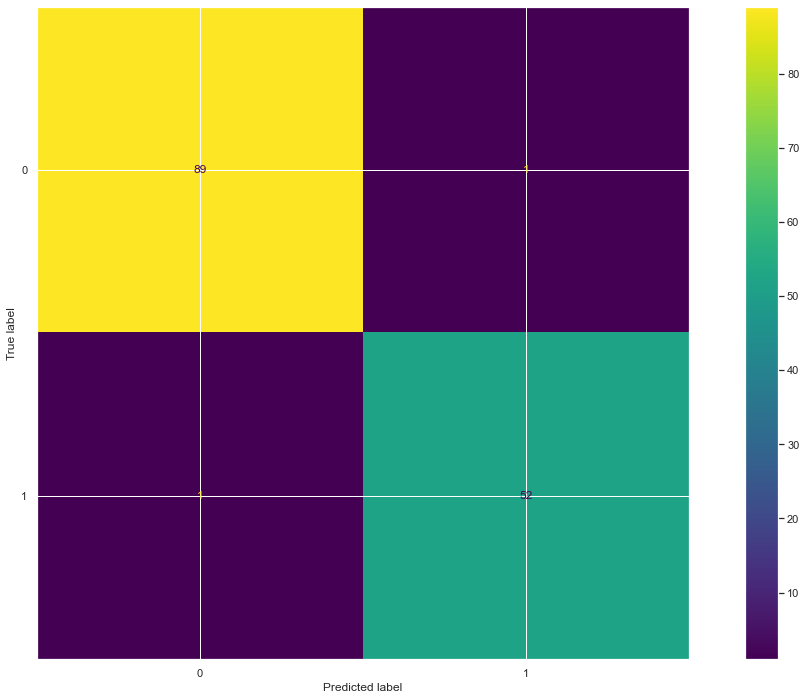

In [33]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=pred_test)

In [34]:
metrics.confusion_matrix(y_true=y_test, y_pred=pred_test)

array([[89,  1],
       [ 1, 52]], dtype=int64)

In [35]:
# using the classification report method  from the metrics package we derive the following metrics on the testing set:
# Recall
# Specificity
# Precision
# False Positive Rate
# F1 Score
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



<ul>The following metrics derived from the classification report are:
<li>Recall is 0.98.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.98.</li>
<li>False Positive Rate is 0.01.</li>
<li>F1 Score is 0.98.</li>
</ul>

### Question 7 [10 points]

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [36]:
n_neighbors=1

# instanciate KNN classifier object
knnclf=neighbors.KNeighborsClassifier(n_neighbors) 

# fit the model by training it with the training data set and training labels or target
knnclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
# next, we call the predict function on the test instances to produce the predicted classes.
# we predict on the test set.
knnpred_test = knnclf.predict(X_test)

In [38]:
# let's compare the predicted with the actual labals
print(knnpred_test)
print(y_test)

[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1]
276    0
391    0
177    1
447    0
78     1
      ..
21     0
265    1
231    0
244    1
112    0
Name: target, Length: 143, dtype: int64


In [39]:
# compute the average training score across the training instances
metrics.accuracy_score(y_train, knnclf.predict(X_train))

1.0

In [40]:
# The average training score across the training instances can also be computed as below:
knnclf.score(X_train, y_train)

1.0

In [41]:
# compute the average testing score across the testing instances
metrics.accuracy_score(y_test, knnpred_test)

0.9440559440559441

In [42]:
# The average testing score across the testing instances can also be computed as below:
knnclf.score(X_test, y_test)

0.9440559440559441

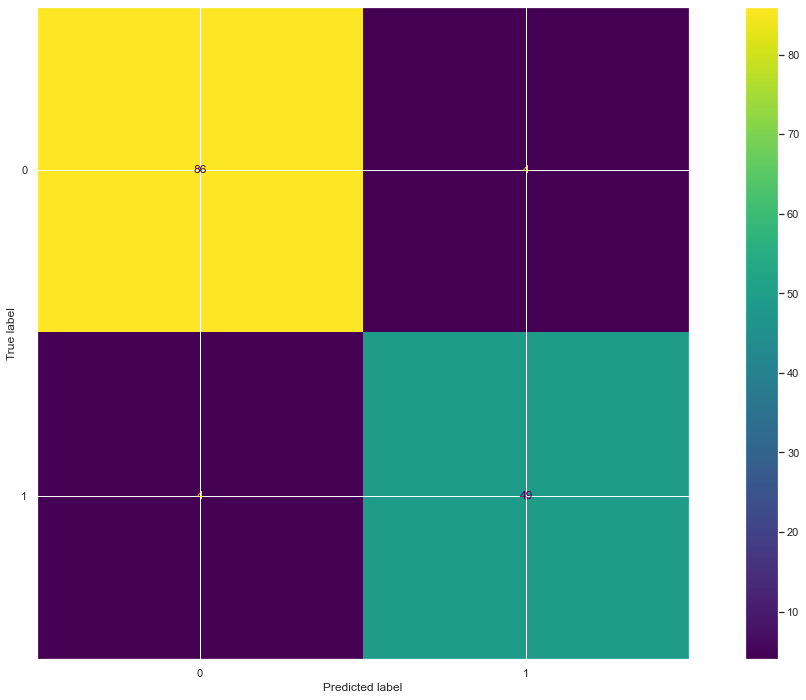

In [43]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knnpred_test)

In [44]:
metrics.confusion_matrix(y_true=y_test, y_pred=knnpred_test)

array([[86,  4],
       [ 4, 49]], dtype=int64)

In [45]:
# Using the classification report from the metrics package to calculate Recall(Sensitivity)
#, Specificity, Precision and F1-Score.
print(metrics.classification_report(y_test, knnpred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



<ul>The following metrics of the KNN classifier derived from the classification report are:
<li>Recall(Sensitivity) is 0.92.</li>
<li>Specificity is 0.96.</li>
<li>Precision is 0.92.</li>
<li>False Positive Rate is 0.04.</li>
<li>F1 Score is 0.92.</li>
</ul>

### Question 8 [10 points]

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [46]:
# instanciate a Gaussian Naive Bayes classifier object
nbclf = naive_bayes.GaussianNB()

# fit the model by training it with the training data set and training labels or target
nbclf.fit(X_train, y_train)

GaussianNB()

In [47]:
# next, we call the predict function on the test instances to produce the predicted classes.
nbclfpred_test = nbclf.predict(X_test)

In [48]:
# compute the average training score across the training instances.
nbclf.score(X_train, y_train)

0.9366197183098591

In [49]:
# compute the average testing score across the testing instances.
nbclf.score(X_test, y_test)

0.958041958041958

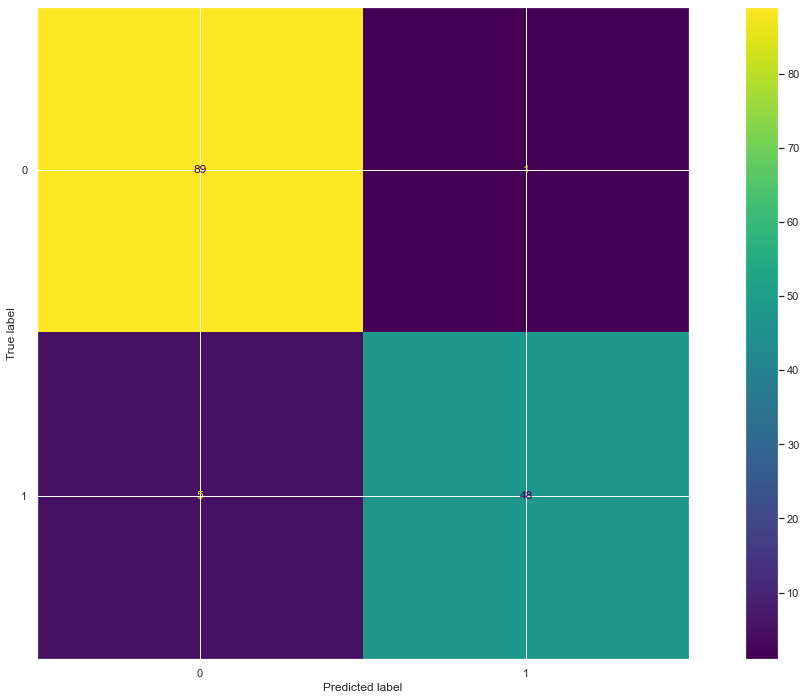

In [50]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=nbclfpred_test)

In [51]:
metrics.confusion_matrix(y_true=y_test, y_pred=nbclfpred_test)

array([[89,  1],
       [ 5, 48]], dtype=int64)

In [52]:
# Using the classification report from the metrics package to calculate Recall(Sensitivity)
#, Specificity, Precision and F1-Score.
print(metrics.classification_report(y_test, nbclfpred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



<ul>The following metrics of the Gaussian Naive Bayes classifier derived from the classification report are:
<li>Recall(Sensitivity) is 0.91.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.98.</li>
<li>False Positive Rate is 0.01.</li>
<li>F1 Score is 0.94.</li>
</ul>

### Question 9 [10 points]

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [53]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # fit the model on the training set
    clf.fit(X_train, y_train)
    print('Iterations:', clf.n_iter_)
    
    # derive the classifier's prediction on the training set
    pred_train = clf.predict(X_train)
    
    # calculate the training accuracy scores and add them to the list of accuracy_train.
    accuracy_train.append(metrics.accuracy_score(y_true=y_train, y_pred=pred_train))
    
    # derive the classifier's prediction on the testing set
    pred_test = clf.predict(X_test)
    
    # calculate the testing accuracy scores and add them to the accuracy_test list.
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=pred_test))
    

Iterations: [91]
Iterations: [129]
Iterations: [272]
Iterations: [228]
Iterations: [429]
Iterations: [697]
Iterations: [889]
Iterations: [1590]
Iterations: [2371]
Iterations: [2549]
Iterations: [4359]
Iterations: [5895]
Iterations: [5585]
Iterations: [4243]
Iterations: [5539]
Iterations: [3995]
Iterations: [7290]


C:\Users\REJALU\.conda\envs\renv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iterations: [10000]
Iterations: [7767]


In [54]:
accuracy_train

[0.9248826291079812,
 0.931924882629108,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347,
 0.9413145539906104,
 0.9413145539906104,
 0.9460093896713615,
 0.9483568075117371,
 0.9507042253521126,
 0.9624413145539906,
 0.9741784037558685,
 0.9788732394366197,
 0.9812206572769953,
 0.9859154929577465,
 0.9859154929577465,
 0.9882629107981221,
 0.9882629107981221,
 0.9882629107981221]

In [55]:
accuracy_test

[0.9370629370629371,
 0.958041958041958,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.986013986013986,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.993006993006993,
 0.986013986013986,
 0.986013986013986,
 0.972027972027972,
 0.986013986013986,
 0.972027972027972]

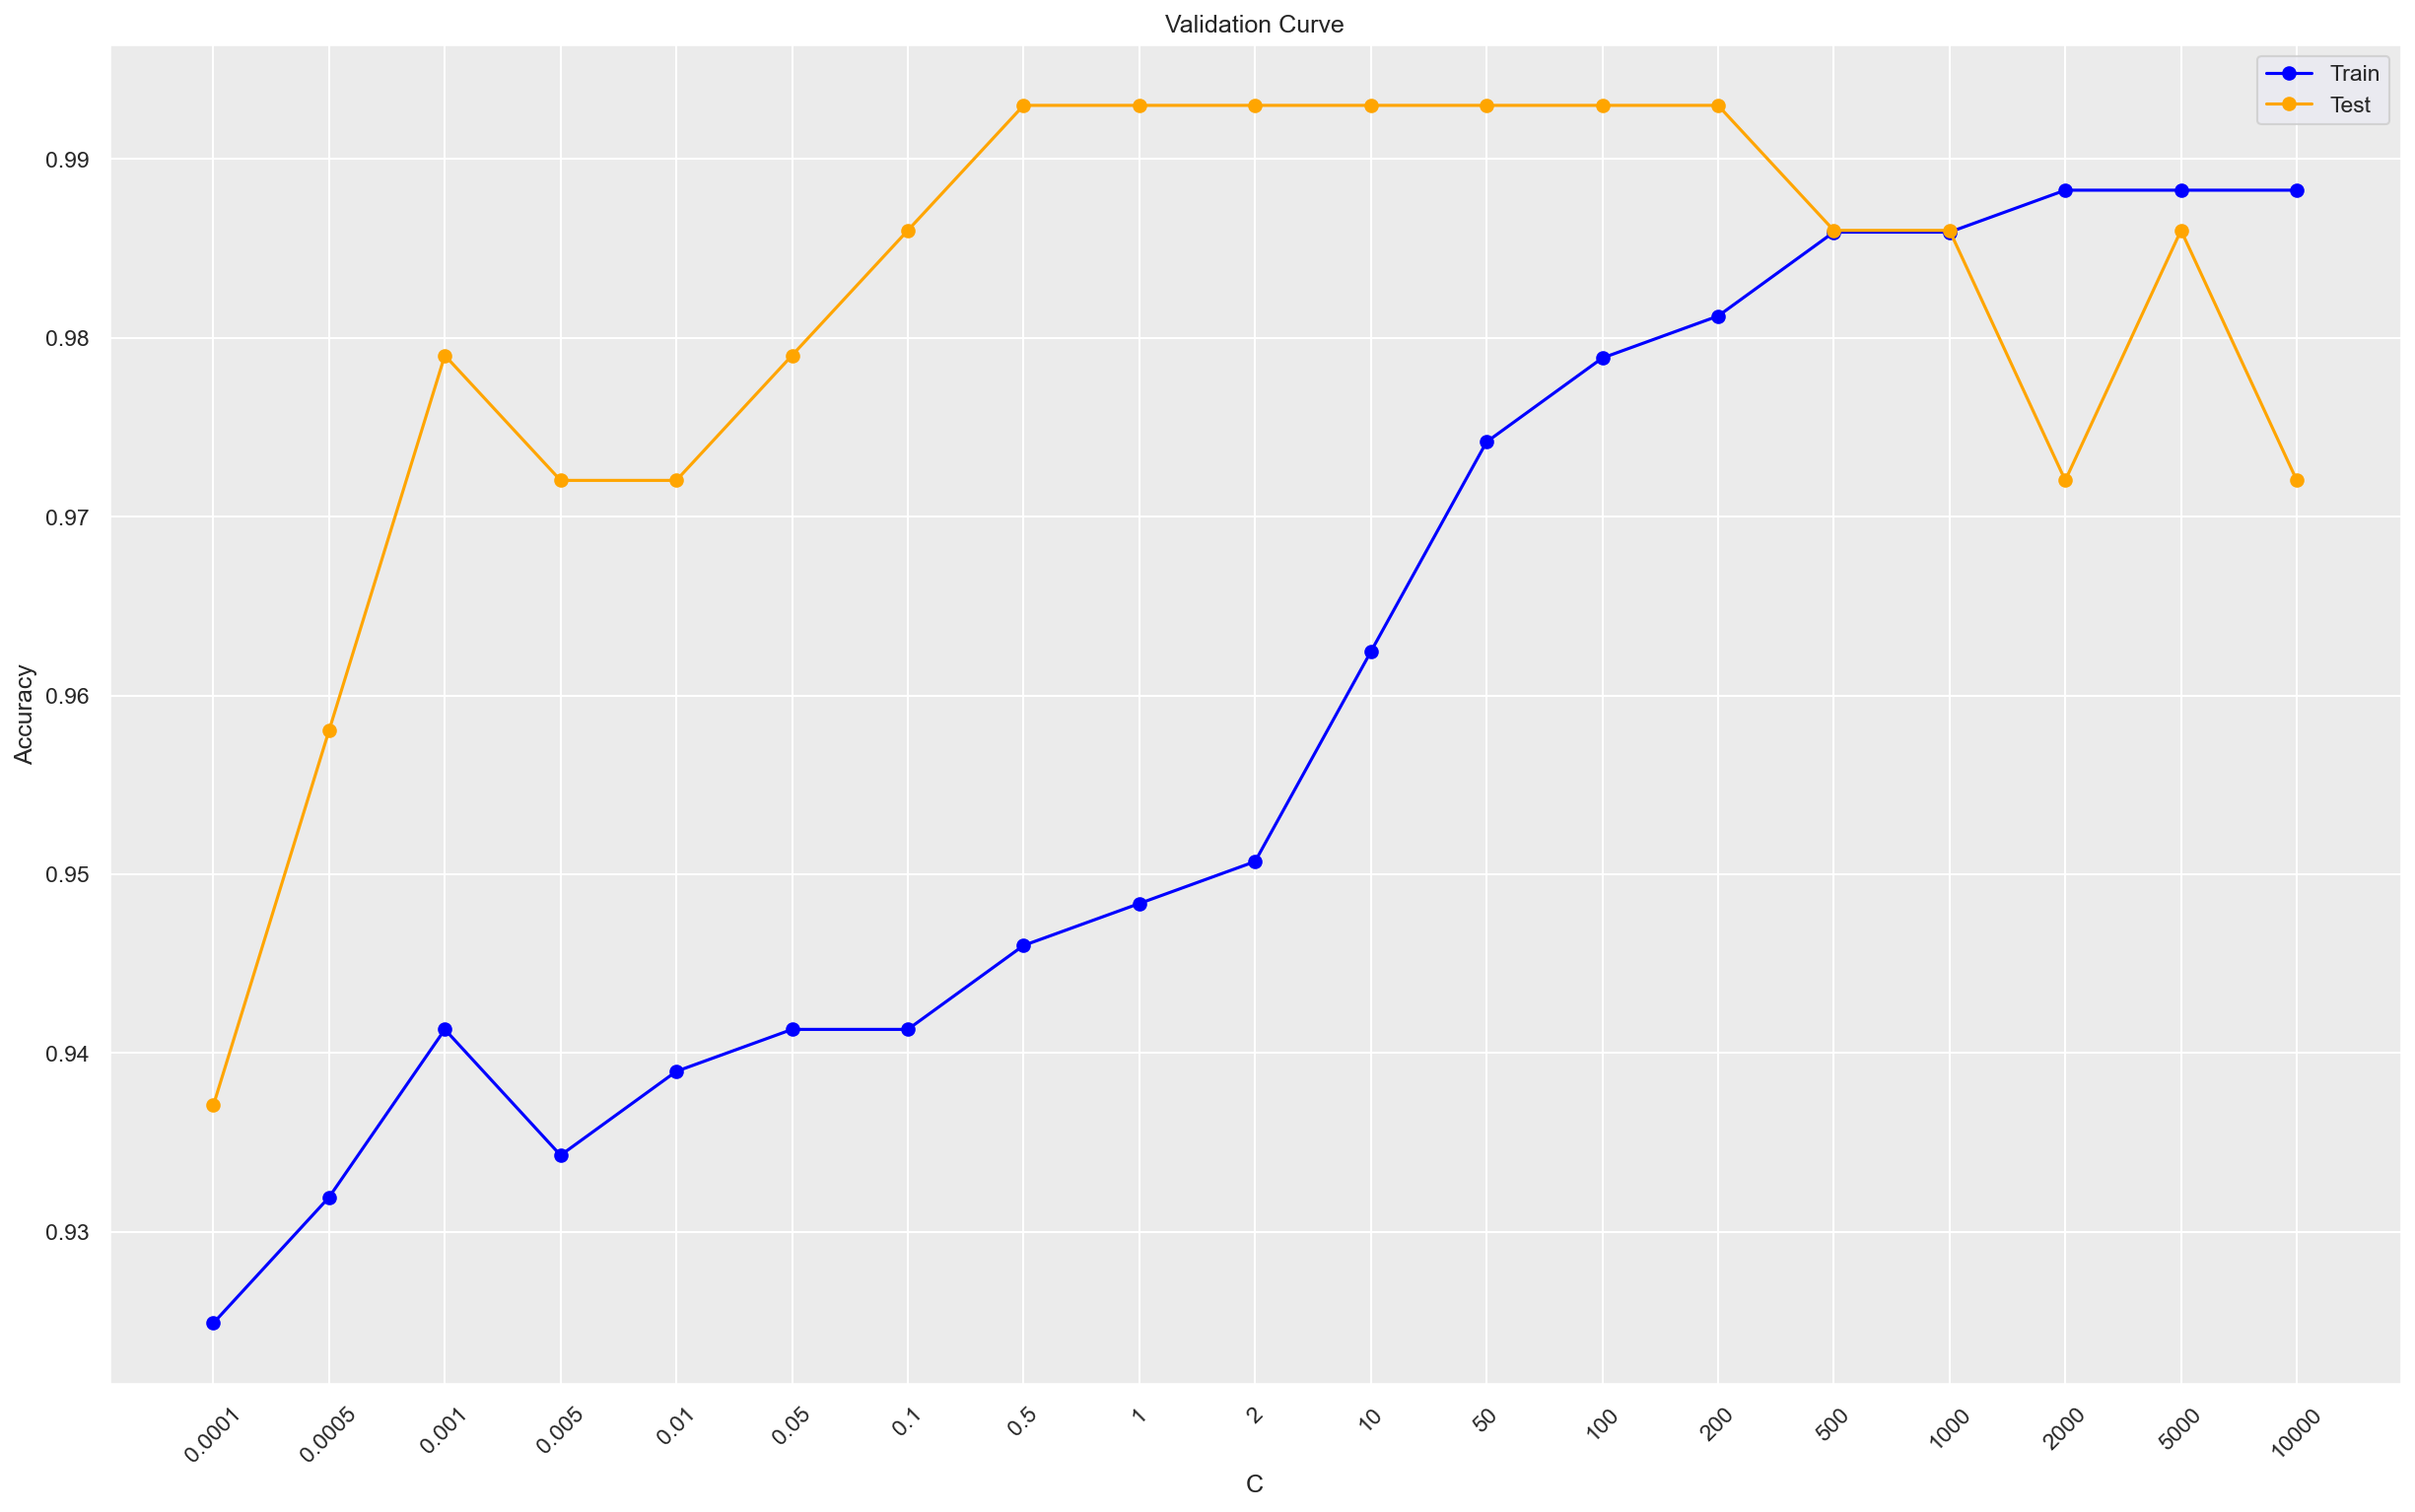

In [56]:
# Plotting the validation curve
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='Train')
plt.plot(accuracy_test, marker='o', color='orange', label='Test')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
plt.legend()
plt.show()

### Question 10 [10 points]

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [57]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    # instanciate KNN classifier object
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    
    # fit the model by training it with the training data set and training labels on each K value.
    clf.fit(X_train, y_train)
    
    
    # make the prediction on the training instances to produce the predicted classes.
    clfpred_train = clf.predict(X_train)
    
    # compute the average training score across the training instances and add it to the accuracy_train list.
    accuracy_train.append(metrics.accuracy_score(y_train, clfpred_train))
    
    # make the prediction on the test instances to produce the predicted classes.
    clfpred_test = clf.predict(X_test)
    
    # compute the average testing score across the test instances and add it to the accuracy_test list.
    accuracy_test.append(metrics.accuracy_score(y_test, clfpred_test))

In [58]:
accuracy_train

[1.0,
 0.9483568075117371,
 0.9460093896713615,
 0.9389671361502347,
 0.931924882629108,
 0.9248826291079812,
 0.9272300469483568,
 0.9248826291079812,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056,
 0.9131455399061033,
 0.9084507042253521,
 0.9014084507042254]

In [59]:
accuracy_test

[0.9440559440559441,
 0.965034965034965,
 0.9370629370629371,
 0.9440559440559441,
 0.9370629370629371,
 0.9440559440559441,
 0.9440559440559441,
 0.9370629370629371,
 0.9370629370629371,
 0.9370629370629371,
 0.9300699300699301,
 0.9230769230769231,
 0.9300699300699301,
 0.9090909090909091]

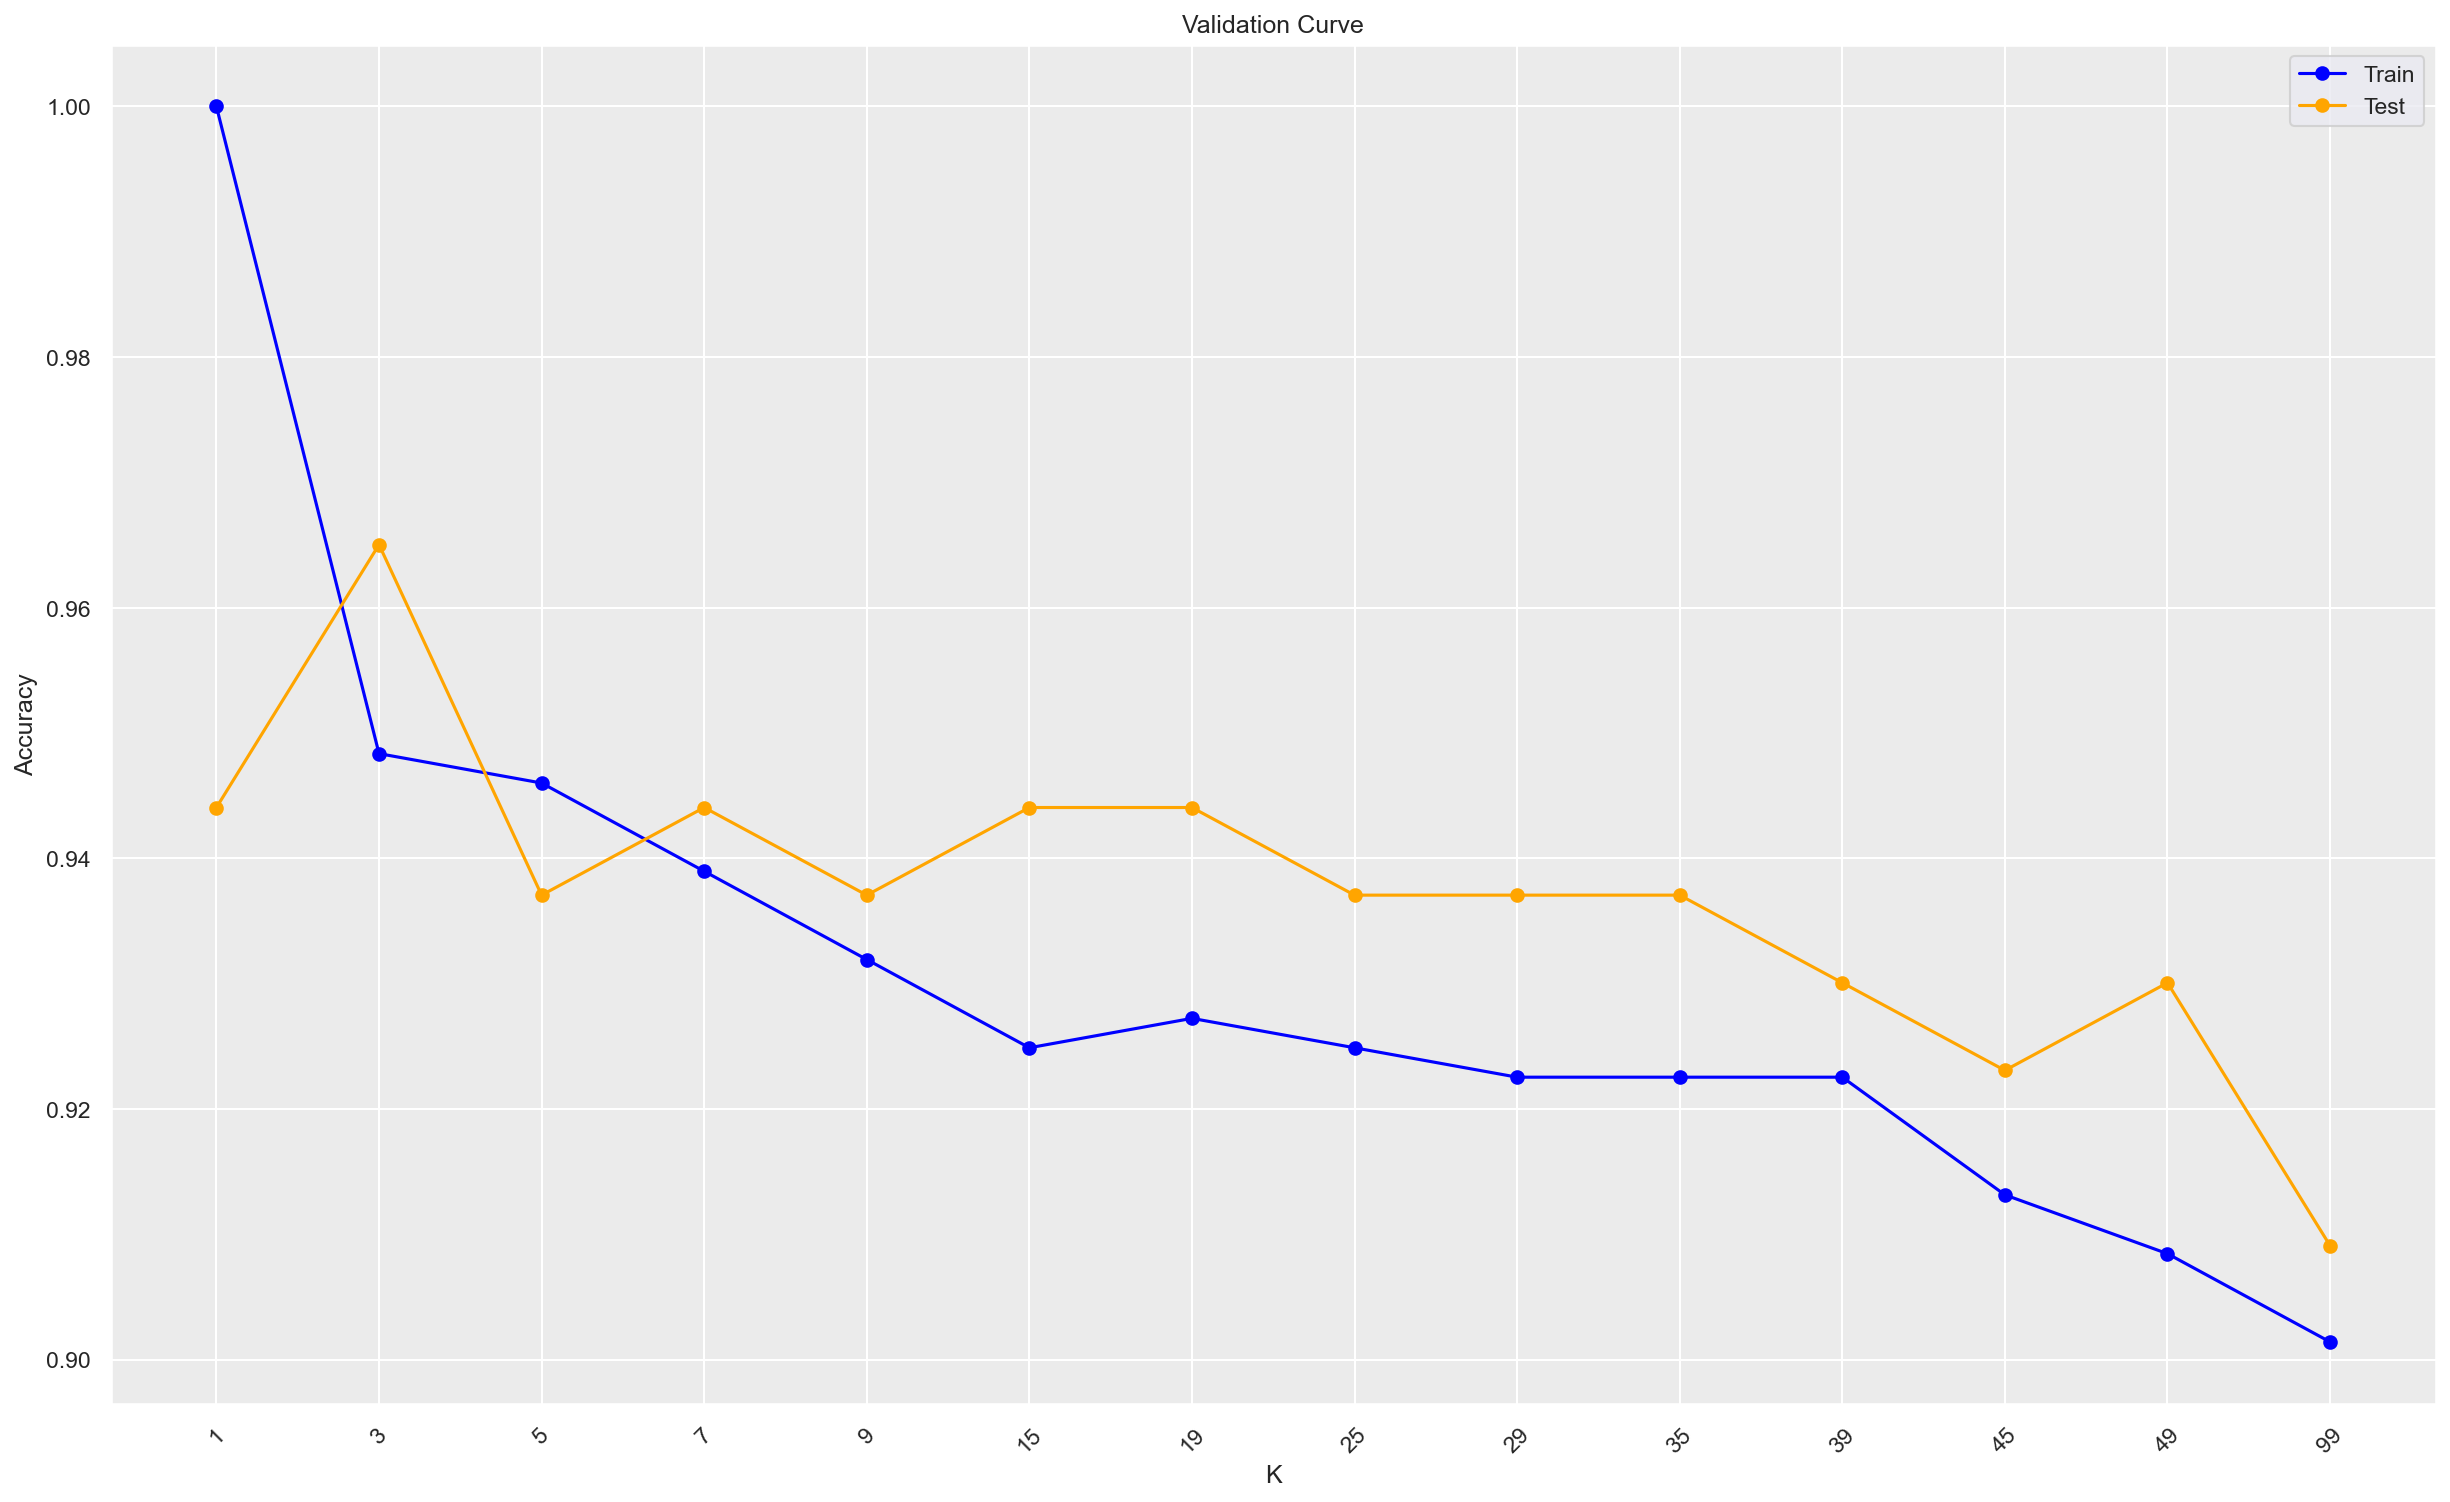

In [60]:
# Validation Curve
# Plotting the validation curve
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='Train')
plt.plot(accuracy_test, marker='o', color='orange', label='Test')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
plt.legend()
plt.show()

### Question 11 [10 points]

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.
- Apply standardization to the data and re-do Quesion 9 and plot the validation curve for logistic regression models with same parameter range for C. 
- Plot the validation curve. What do you see? 
- Which value would you choose for C in logistic regression? Why?

In [61]:
from sklearn import preprocessing

In [62]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [63]:
# check the type of the training set
type(X_train_ss)

numpy.ndarray

In [64]:
# Display the first 6 records
X_train_ss[:6] 

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739],
       [-0.25939892,  2.01600256, -0.28883209, -0.32705063, -0.64777834,
        -0.65989952, -0.72987448, -0.40231316, -0.66782222, -0.68044926,
        -0.59670438,  0.71846531, -0.62543385, -0.4671851 , -0.65912836,
        -0.63423082, -0.53728413, -0.40616168, -0.40217172, -0.88308388,
        -0.39445717,  1.82943029, -0.43700374, -0.44055383, -1.0826243 ,
        -0.73501871, -0.80734839, -0.54291512, -0.72474659, -1.05902965],
       [-0.04919443, -0.52059578, -0.02243949, -0.14911433,  0.97244263,
         0.4584376 ,  0.12110263,  0.10263298,  0

In [65]:
# check the type of the testing set
type(X_test_ss)

numpy.ndarray

In [66]:
# Display the first 6 observation of the numpy array
X_test_ss[:6] 

array([[-0.78631152, -1.18642404, -0.82121057, -0.72129075, -0.14663529,
        -1.22824098, -1.08496538, -1.1559408 ,  0.51583756, -0.62415153,
        -0.58801621,  0.13422772, -0.61265491, -0.48339016,  0.50655823,
        -0.88580874, -0.96437915, -1.36026383,  0.38206209, -0.78185492,
        -0.84417646, -1.10311987, -0.88727672, -0.74290314, -0.27499926,
        -1.13251229, -1.2899998 , -1.5920817 , -0.27314461, -1.08916785],
       [-1.51389933, -0.56897776, -1.49308929, -1.17252609,  0.56898   ,
        -0.55568782, -1.10356878, -1.24132819,  0.62839417,  1.17315353,
         0.42343207,  1.60680132,  0.17472444, -0.23263817,  3.00267369,
        -0.3177605 , -1.01144728, -1.91006024, -0.2277601 ,  1.03919707,
        -1.2648816 , -0.48854253, -1.28540028, -0.99133701,  0.59308969,
        -0.77869257, -1.3136211 , -1.76232035, -0.7691145 ,  0.22157943],
       [ 0.65148721,  0.18439885,  0.70434458,  0.49173438,  0.1733035 ,
         0.98233306,  1.13959788,  1.0300328 , -0

In [67]:
X_train_ss.shape

(426, 30)

In [68]:
X_test_ss.shape

(143, 30)

In [69]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # fit the model on the training set
    clf.fit(X_train_ss, y_train)
    print('Iterations:', clf.n_iter_)
    
    # derive the classifier's prediction on the training set
    pred_train = clf.predict(X_train_ss)
    
    # calculate the training accuracy scores and add them to the list of accuracy_train.
    accuracy_train.append(metrics.accuracy_score(y_true=y_train, y_pred=pred_train))
    
    # derive the classifier's prediction on the testing set
    pred_test = clf.predict(X_test_ss)
    
    # calculate the testing accuracy scores and add them to the accuracy_test list.
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=pred_test))

Iterations: [10]
Iterations: [11]
Iterations: [11]
Iterations: [12]
Iterations: [12]
Iterations: [16]
Iterations: [17]
Iterations: [25]
Iterations: [32]
Iterations: [42]
Iterations: [75]
Iterations: [141]
Iterations: [167]
Iterations: [223]
Iterations: [340]
Iterations: [438]
Iterations: [480]
Iterations: [591]
Iterations: [662]


In [70]:
accuracy_train

[0.6455399061032864,
 0.8356807511737089,
 0.8849765258215962,
 0.9460093896713615,
 0.9483568075117371,
 0.9788732394366197,
 0.9835680751173709,
 0.9906103286384976,
 0.9906103286384976,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9929577464788732,
 0.9953051643192489,
 0.9976525821596244,
 0.9976525821596244,
 1.0,
 1.0,
 1.0]

In [71]:
accuracy_test

[0.6363636363636364,
 0.8671328671328671,
 0.9300699300699301,
 0.965034965034965,
 0.965034965034965,
 0.9790209790209791,
 0.986013986013986,
 0.986013986013986,
 0.9790209790209791,
 0.9790209790209791,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965,
 0.965034965034965]

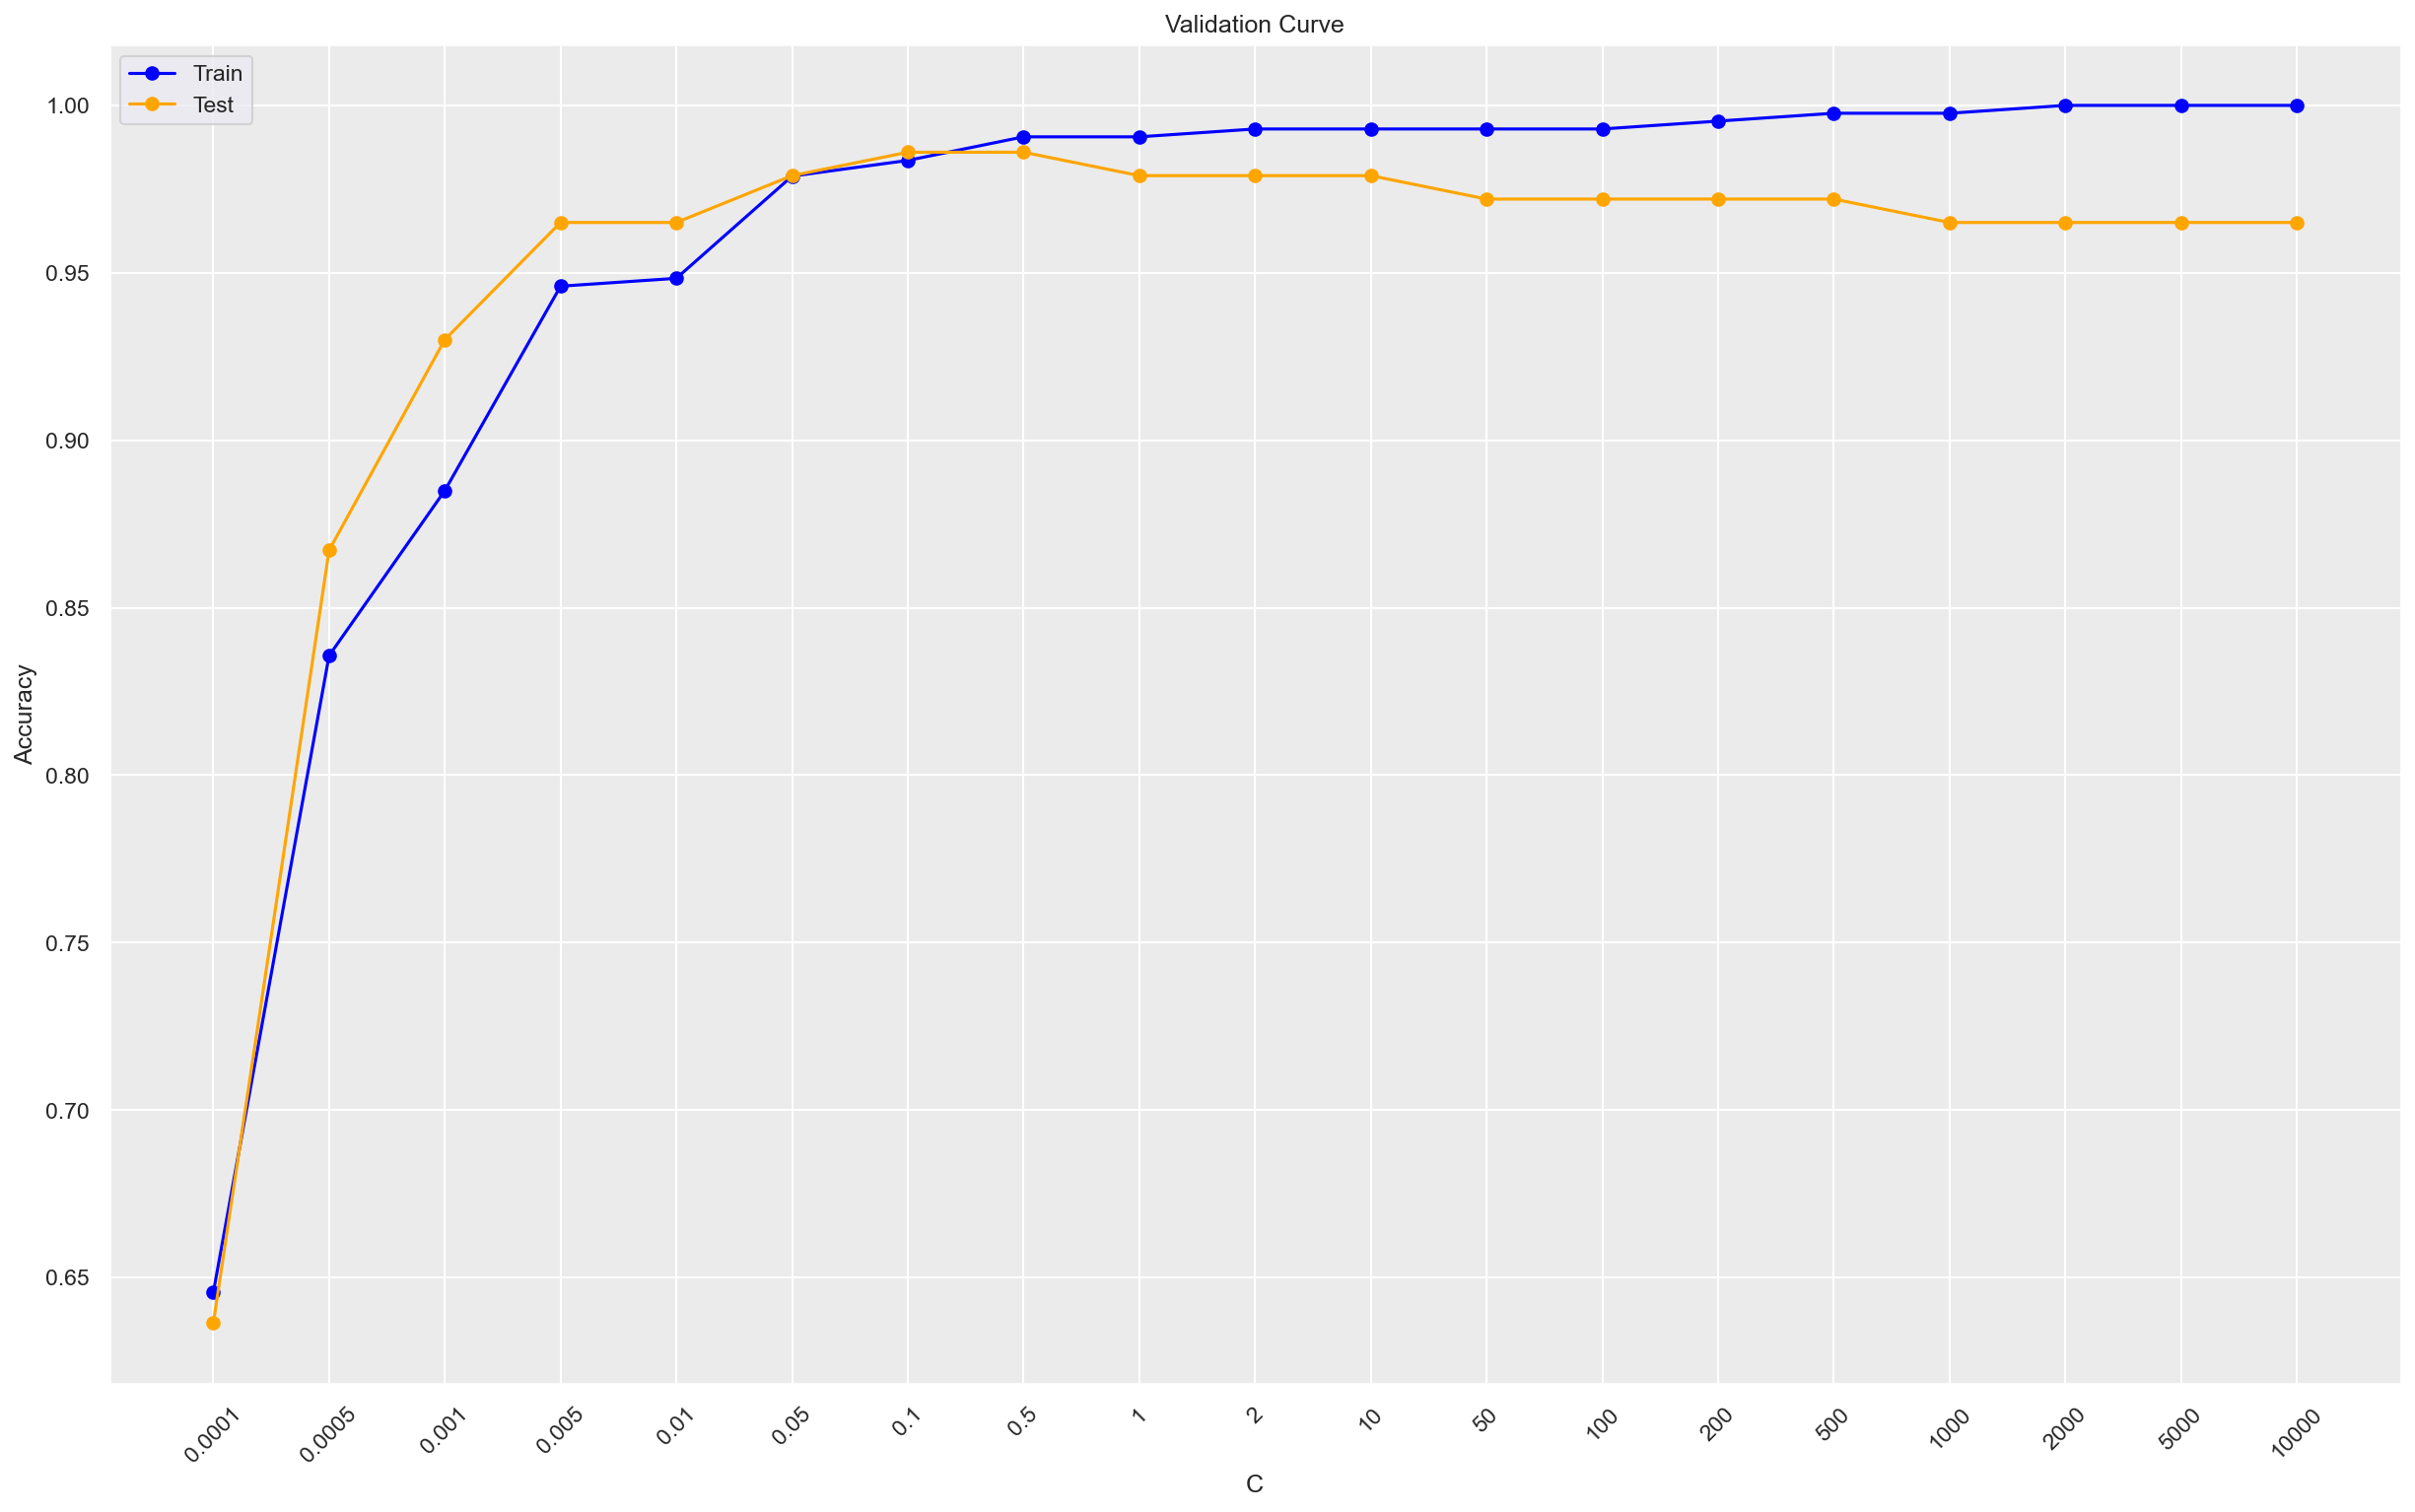

In [72]:
# Plotting the validation curve
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='Train')
plt.plot(accuracy_test, marker='o', color='orange', label='Test')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
plt.legend()
plt.show()

<p>The validation curve looks much better after standardizing the data.</p>

<p>The training curve is blue and validation curve is orange. On the x-axis, there are different C values from small to large. Both training and validation accuracy increase then at some point they stay constant.At c equal 0.5, the training curve is higher than the validation curve; training curve is around 0.98 and validation curve is around 0.97, there is a difference of 1% meaning that this model might be slightly overfitting. The best value of c is around 0.5.</p>

### Question 12 [5 points]

In [73]:
X_train_ss.shape

(426, 30)

In [74]:
X_train_ss[0:426,:].shape

(426, 30)

- After choosing your best C value, let's check the learning curve.
- Create a logistic regression model of your chosen C value, and the other parameters the same as before.
- Starting from 1 data point in the training set, increase your training set size by 1 point in each iteration, fit the model, get the accuracy scores for both the current training and test sets.
- Increase the training set size consecutively. Do not randomly select data points. (`X_train_ss[0:N,:] where N = {1,2,3,...,len(X_train_ss)}`)
- Plot the learning curve. What do you see? Comment on your finding. 

In [75]:
X_train_ss.shape

(426, 30)

In [76]:
X_train_ss.shape[0]

426

In [77]:
# Code here
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.5)

# so here we start with 2  data point and on each iteration we increase by 1 point.
num_points = list(range(2, X_train_ss.shape[0], 1))
for num in num_points:
    # within the for loop we increase the number of points each time.
    # we fit the model
    clf.fit(X_train_ss[0:num, :], y_train[0:num])
    
    # make predictions on the training set, the training set keeps on changing since we are increasing the number of points.
    pred_train = clf.predict(X_train_ss[0:num, :])
    
    # append the training accuracy score to the accuracy_train list.
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:num], y_pred = pred_train))
    
    # make predictions on the validation set, the validation set is connstant and it isn't changing.
    pred_val = clf.predict(X_test_ss)
    accuracy_val.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_val))

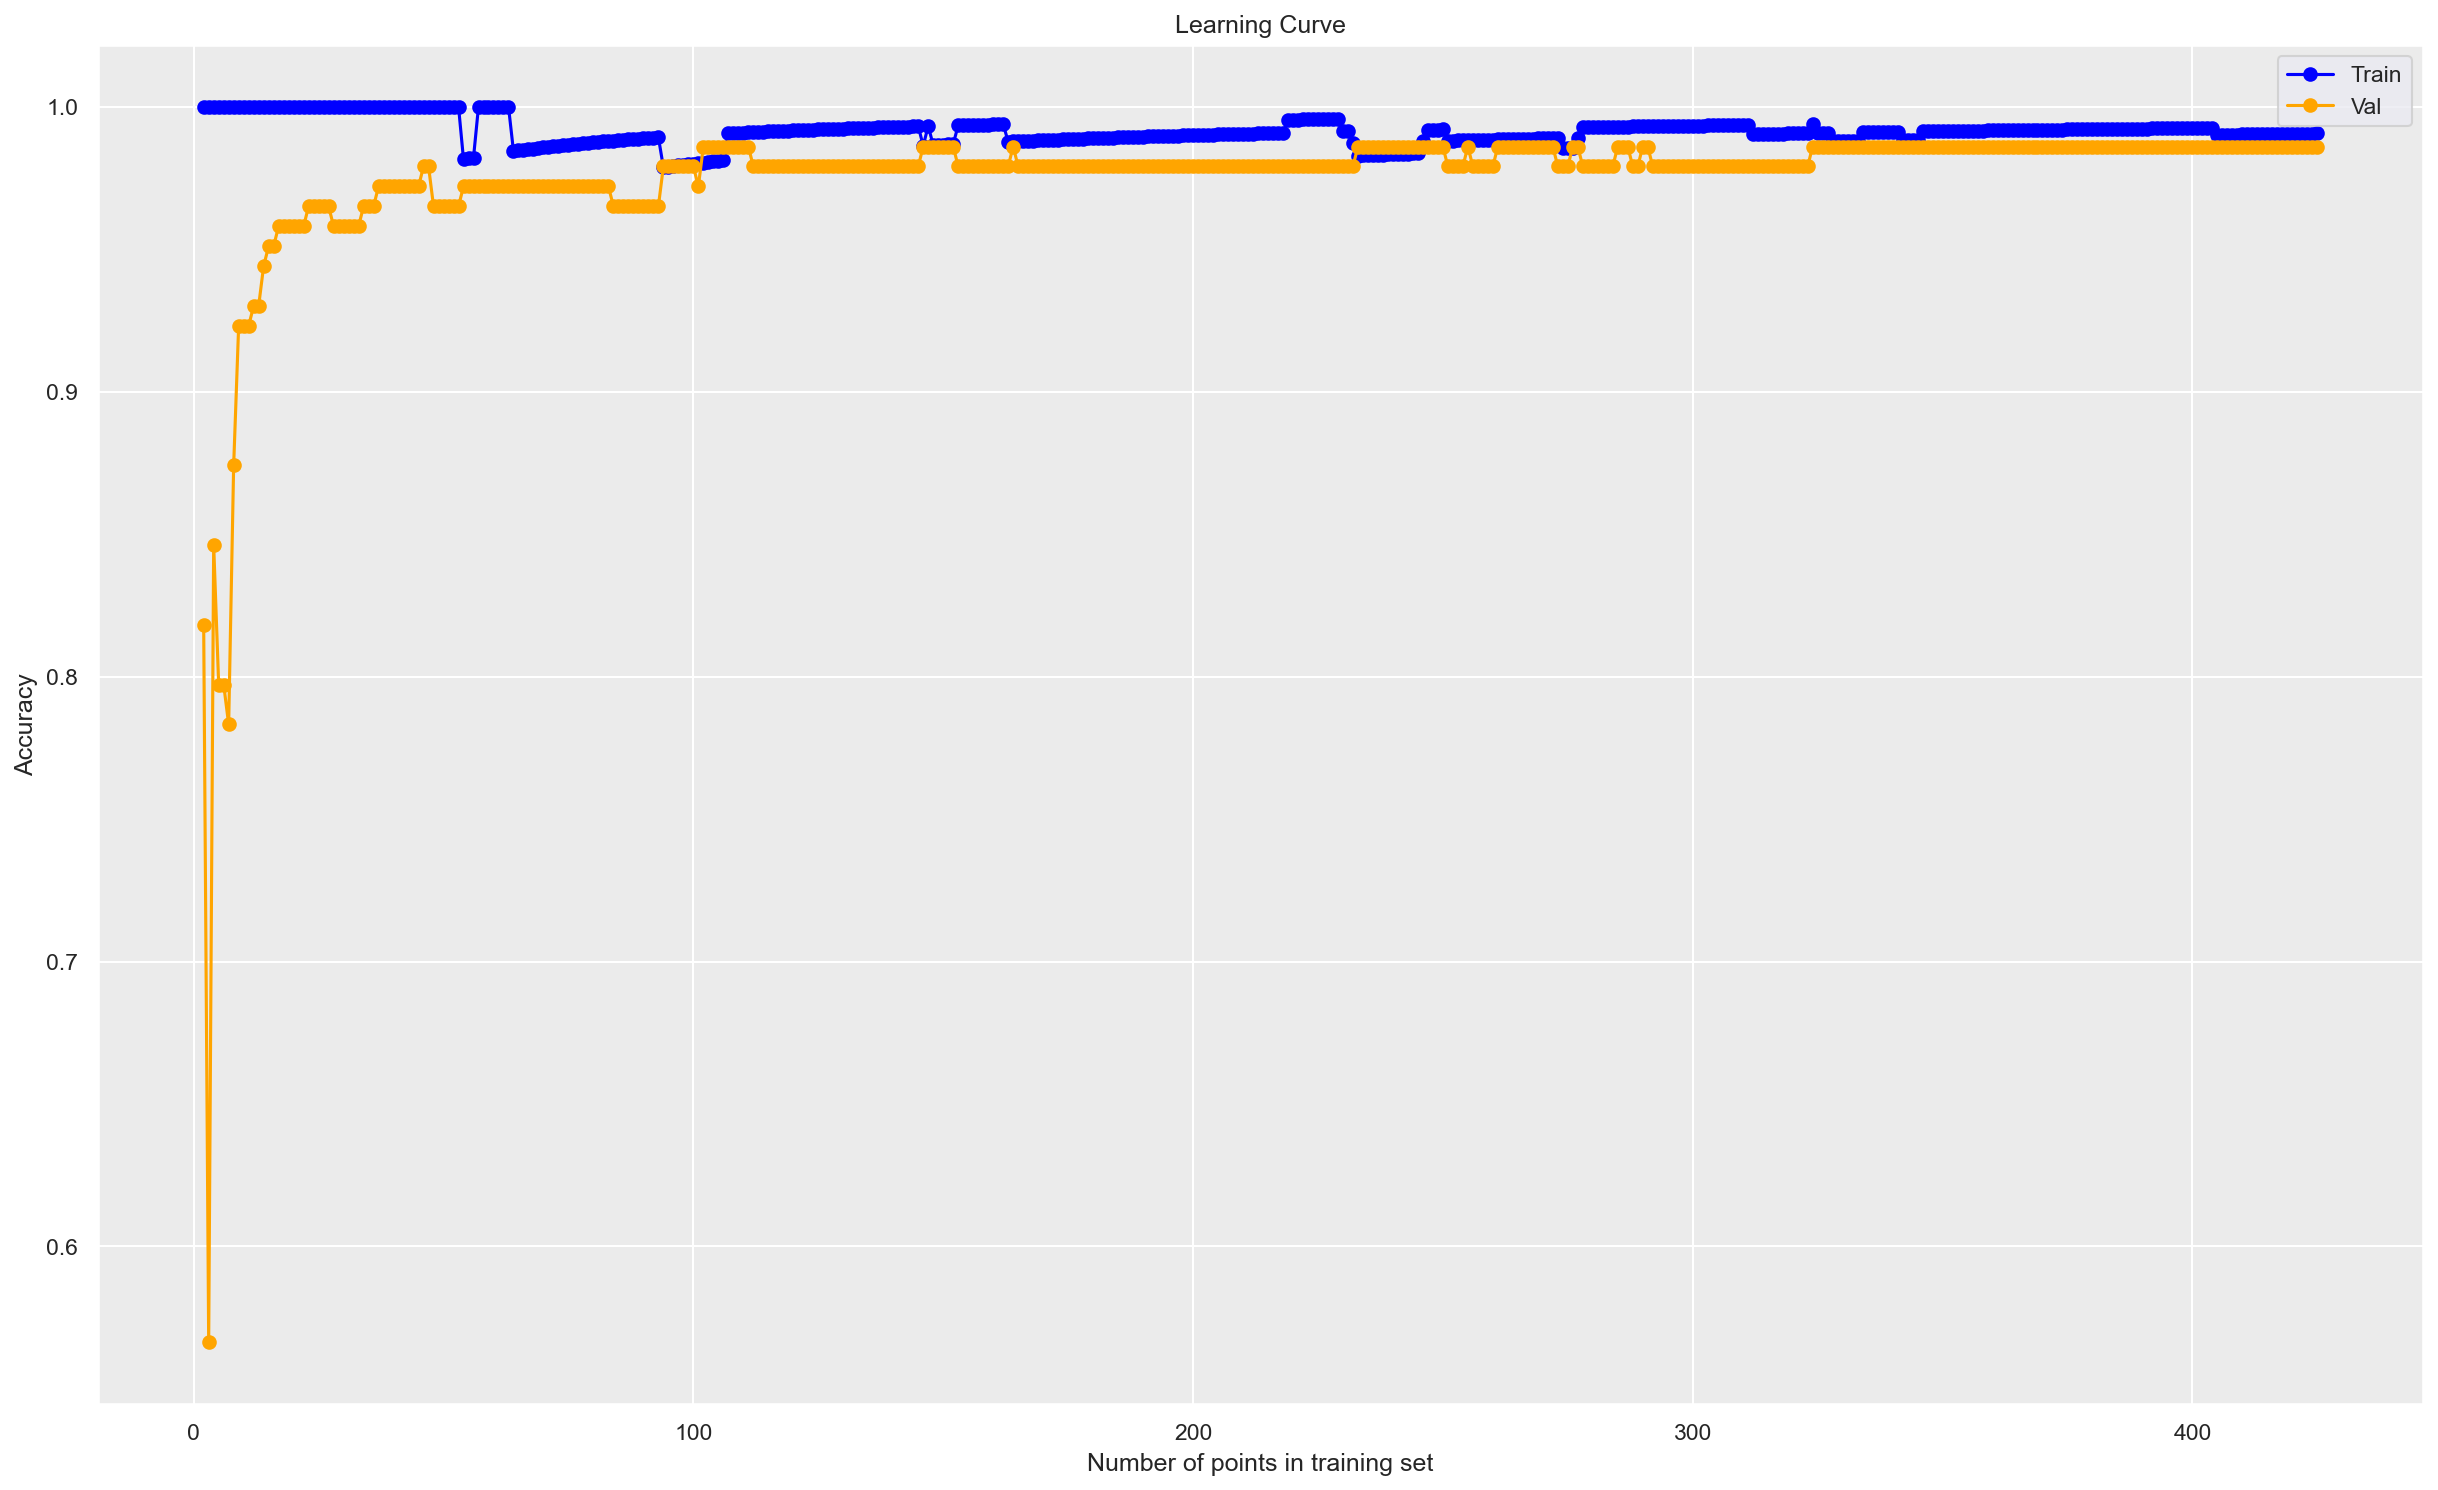

In [78]:
# Plotting the learning curve
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='blue', label='Train')
ax.plot(num_points, accuracy_val, marker='o', color='orange', label='Val')

ax.set_xlabel('Number of points in training set')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
ax.legend();

<p>The training curve is blue and the validation curve is orange.On the x-axis, we have the number of points in the training set. The training accuracy starts very high since they are few points at the beginning and it over fits, however, overfitting decreases gradually as we increase the number of training points.</p>
<p>At the beginning, validation accuracy is useless, but keeps on slowly increasing and at some point around 101, it is kind of constant. Training and validation accuracy do not change after 101.</p>

### Question 13 [5 points]

- Before applying KNN, it is important to scale the features. 
- Use the standardized train and test sets re-do Quesion 10 and plot the validation curve for KNN models with same parameter range for K. 
- Plot the validation curve. What do you see? 
- Which value would you choose for K in nearest neighbor model?

In [79]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    # instanciate KNN classifier object
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    
    # fit the model by training it with the training data set and training labels on each K value.
    clf.fit(X_train_ss, y_train)
    
    
    # make the prediction on the training instances to produce the predicted classes.
    clfpred_train = clf.predict(X_train_ss)
    
    # compute the average training score across the training instances and add it to the accuracy_train list.
    accuracy_train.append(metrics.accuracy_score(y_train, clfpred_train))
    
    # make the prediction on the test instances to produce the predicted classes.
    clfpred_test = clf.predict(X_test_ss)
    
    # compute the average testing score across the test instances and add it to the accuracy_test list.
    accuracy_test.append(metrics.accuracy_score(y_test, clfpred_test))

In [80]:
# accuracy_train
accuracy_train

[1.0,
 0.9835680751173709,
 0.9788732394366197,
 0.971830985915493,
 0.971830985915493,
 0.9577464788732394,
 0.960093896713615,
 0.9530516431924883,
 0.9483568075117371,
 0.9530516431924883,
 0.9530516431924883,
 0.9460093896713615,
 0.9483568075117371,
 0.9248826291079812]

In [81]:
# accuracy_test
accuracy_test

[0.951048951048951,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.9790209790209791,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.965034965034965,
 0.972027972027972,
 0.972027972027972,
 0.972027972027972,
 0.965034965034965,
 0.951048951048951]

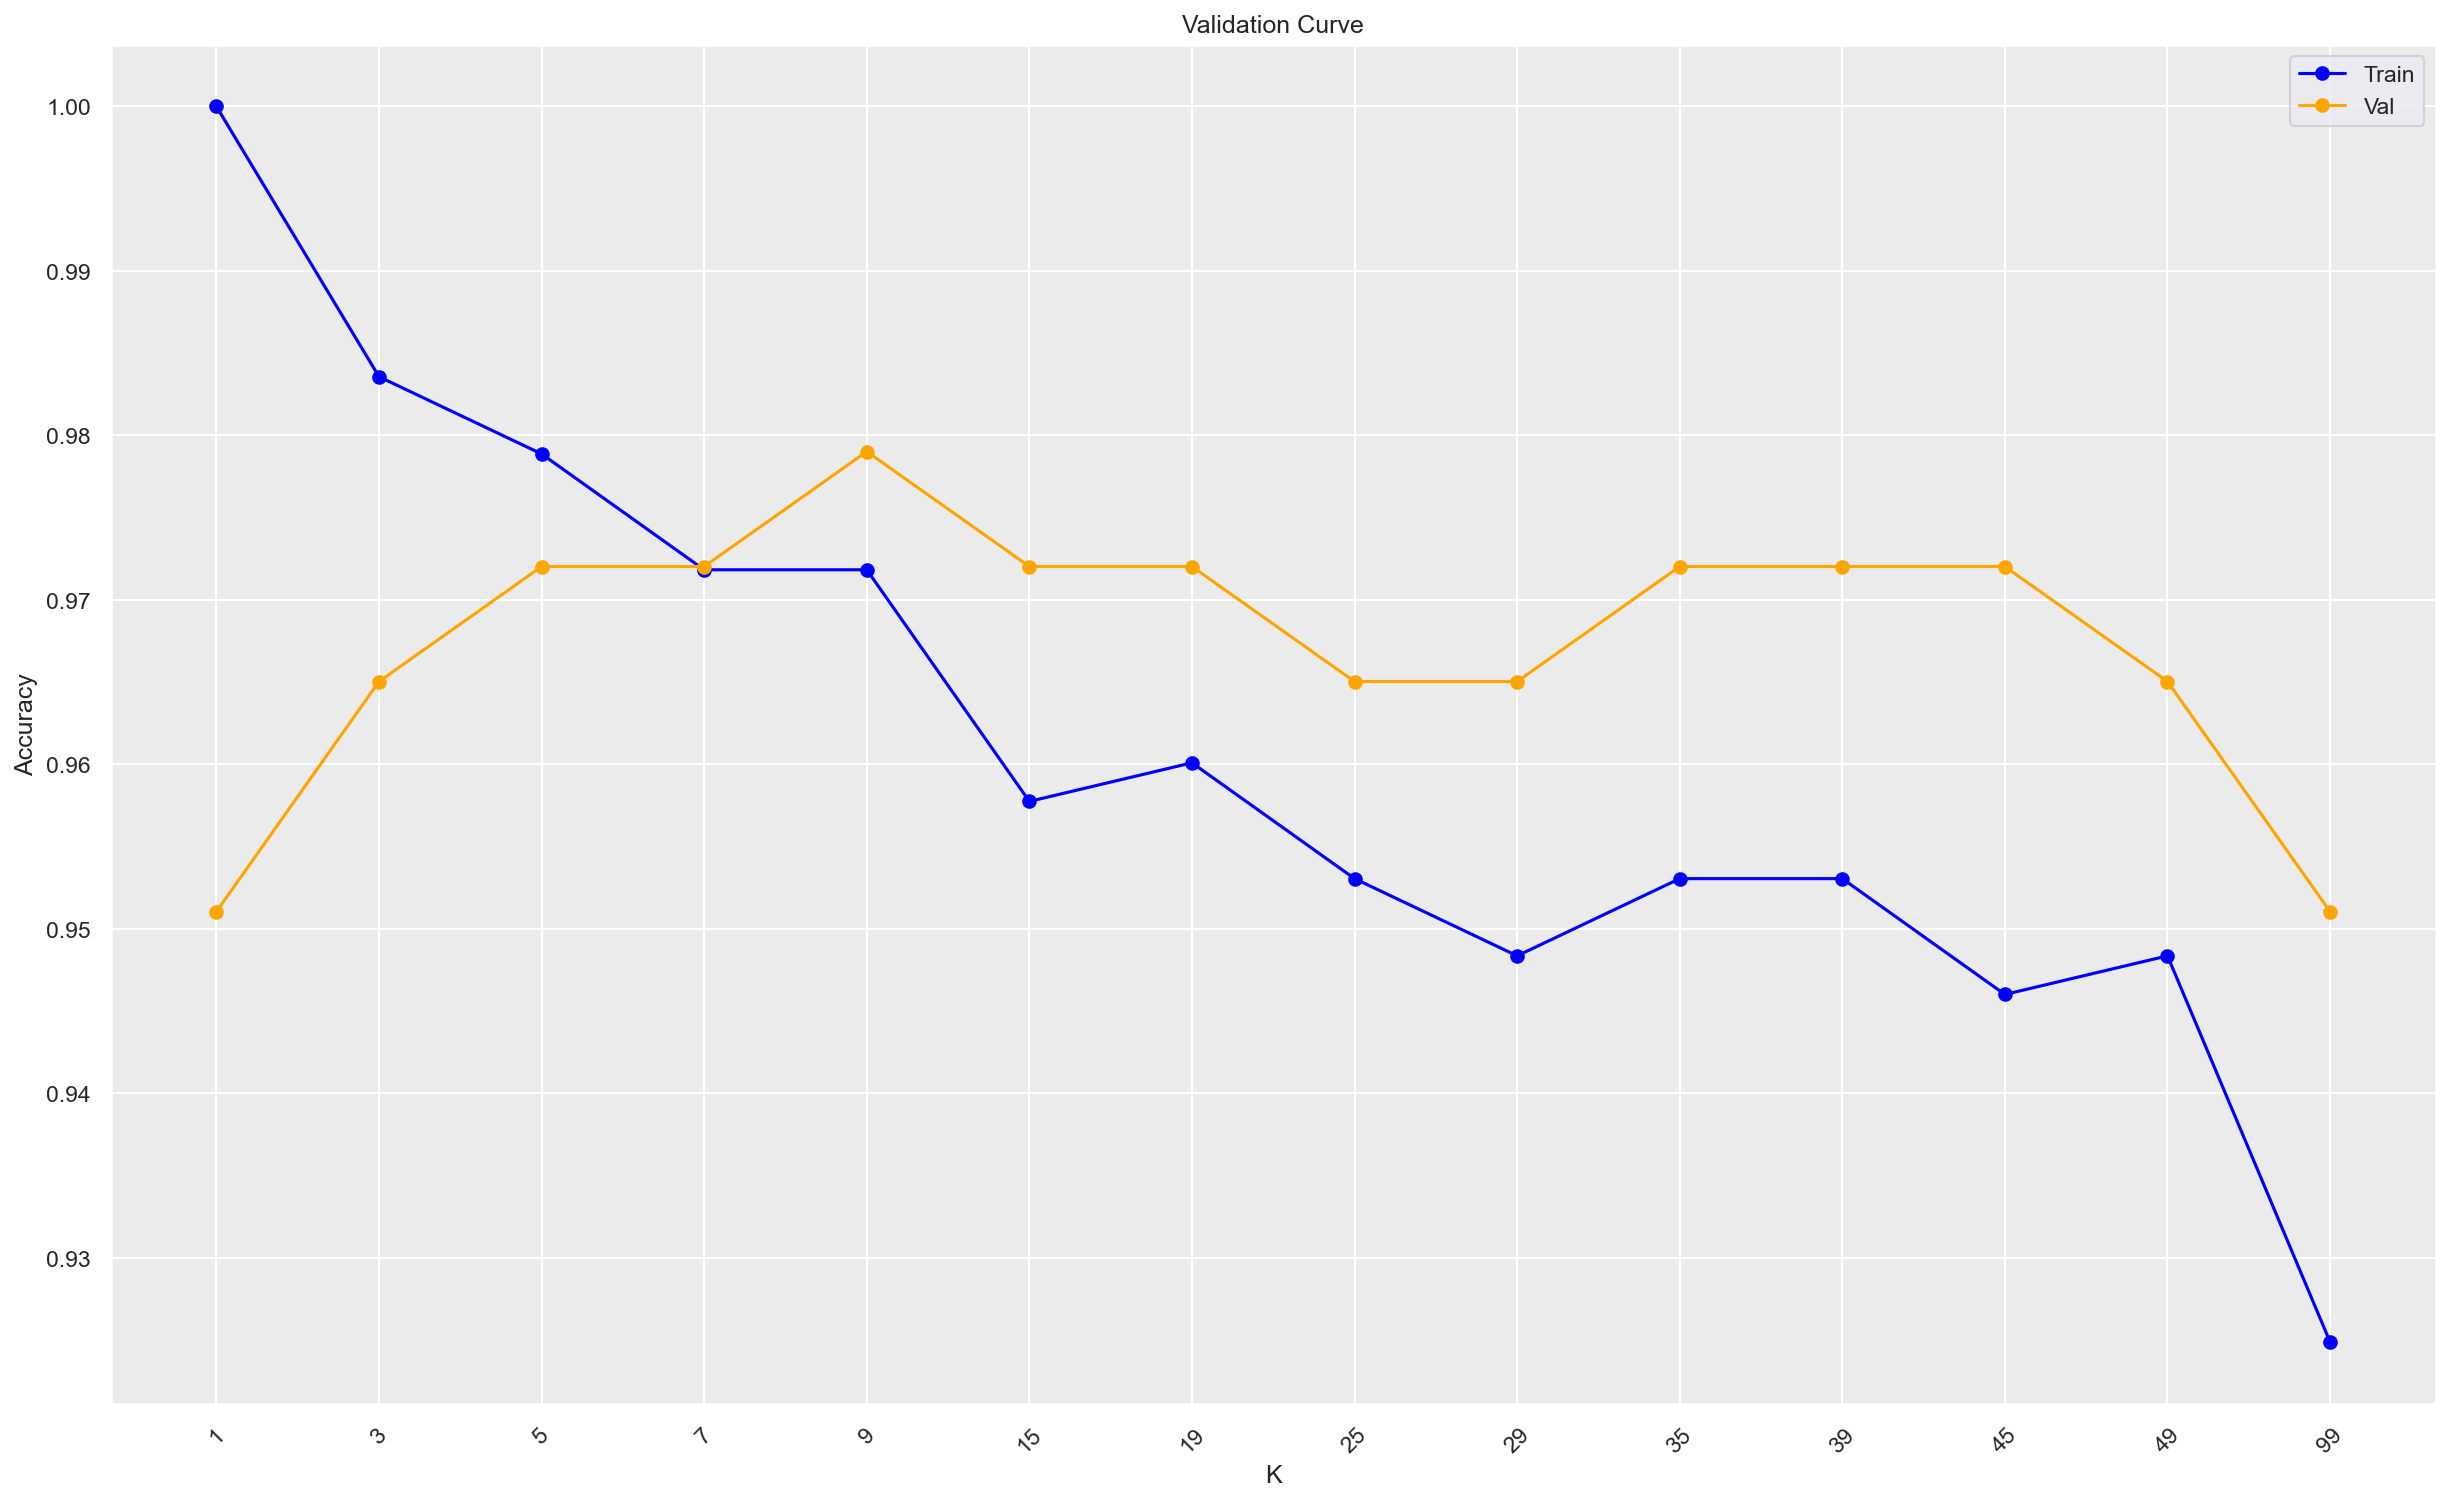

In [82]:
# Validation Curve
# Plotting the validation curve
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='Train')
plt.plot(accuracy_test, marker='o', color='orange', label='Val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
plt.legend()
plt.show()

<p>The training curve is blue and the validation curve is orange. On the X-axis, there are different K values from small to large. At k = 1, Training accuracy starts at 1.0, which gradually decrease as K increases. Also, at K = 1, the Validation accuracy increases as K increases until it stay constant before it start to drop. When K = 7, the Validation curve is on top of the training curve and this is when the validation accuracy is 0.979 and the training accuracy is 0.972. The difference of approximately 0.7 percent is a large gap meaning that the model might be overfitting. Because of this overfitting we might wight want to close this gap abit more and this is what the validation curve is telling us and so the <b>best value of k is 9</b>.  </p>

### Question 14 [10 points]
- Using only the classifier models of logistic regression, Gaussian Naive Bayes, or KNN models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement one of the methods you proposed. 
    - Is the model accuracy increasing? Why do you think this might have helped?
    - If it not increasing, try the other method you proposed. Why do you think this might have helped?
    - If none of them did not improve, comment on why this might have been the case.
    - If you have time try a few more solutions and see which one works. 

<ul>There are two possibilities of improving the accuracy which are:
<li>Dropping all independent variables which are highly correlated of each other.</li>
<li>We also need to reduce on the number of features since they are so many features.</li>
</ul>

Since we already ran a correlation matrix to detect the independetly variables which are high correlated amongst themselves so we drop those variables and run a correlation matrix again.

In [83]:
xcolumns = ['mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'texture error', 
       'smoothness error', 'symmetry error', 'fractal dimension error', 'worst perimeter',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points']

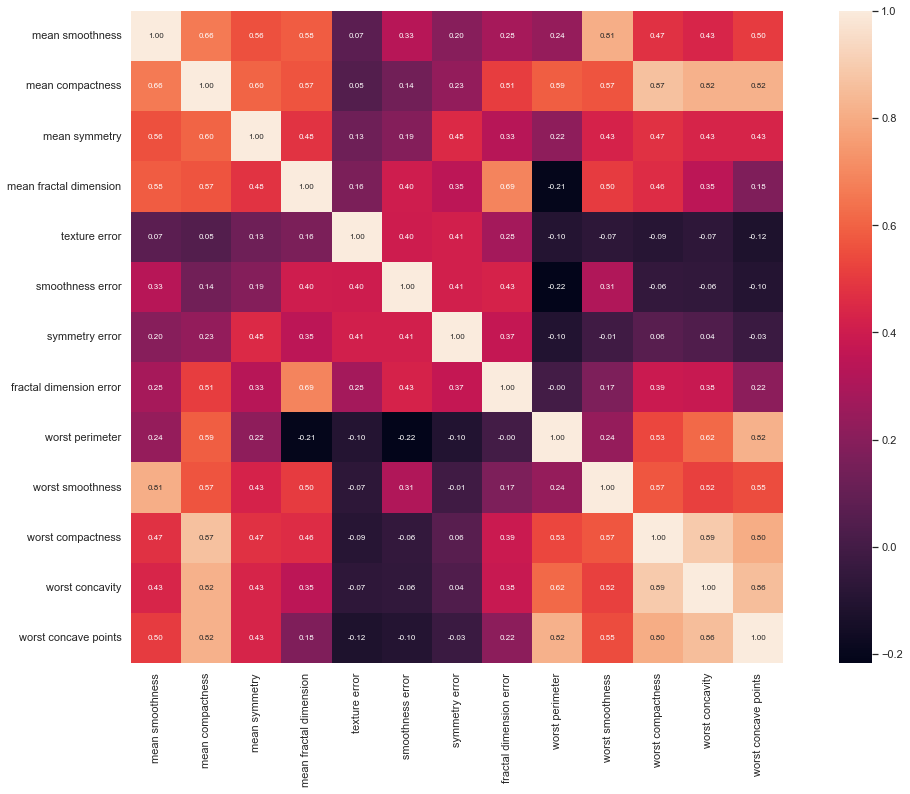

In [84]:
# create a correlation heatmap
corrmat = np.corrcoef(X[xcolumns].values.T) # let's derive a transposed numpy array
# corrmat
sns.set(font_scale=2.0) # set the font
sns.set(rc={'figure.figsize': (20, 12)}) # set figure size
hmap = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=xcolumns, xticklabels=xcolumns)
plt.show()

let's derive a dataframe with the selected attributes that are not highly correlated.

In [85]:
# training data set
X_train_nc = X_train[xcolumns]
X_train_nc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean smoothness          426 non-null    float64
 1   mean compactness         426 non-null    float64
 2   mean symmetry            426 non-null    float64
 3   mean fractal dimension   426 non-null    float64
 4   texture error            426 non-null    float64
 5   smoothness error         426 non-null    float64
 6   symmetry error           426 non-null    float64
 7   fractal dimension error  426 non-null    float64
 8   worst perimeter          426 non-null    float64
 9   worst smoothness         426 non-null    float64
 10  worst compactness        426 non-null    float64
 11  worst concavity          426 non-null    float64
 12  worst concave points     426 non-null    float64
dtypes: float64(13)
memory usage: 46.6 KB


In [86]:
X_train_nc.head() # display the top 5 records

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,fractal dimension error,worst perimeter,worst smoothness,worst compactness,worst concavity,worst concave points
193,0.10340,0.13530,0.1943,0.06937,1.8090,0.009098,0.01878,0.005672,101.70,0.1785,0.4706,0.44250,0.14590
543,0.08671,0.06877,0.1628,0.05781,1.5970,0.004973,0.01724,0.001343,92.48,0.1072,0.1381,0.10620,0.07958
255,0.10960,0.12790,0.1908,0.06130,0.8098,0.006351,0.02062,0.002695,108.10,0.1512,0.3262,0.32090,0.13740
142,0.10920,0.09486,0.1645,0.06562,1.9080,0.006664,0.02282,0.003526,82.66,0.1413,0.1792,0.07708,0.06402
330,0.09491,0.13710,0.1782,0.05976,0.7476,0.005839,0.01467,0.003121,124.30,0.1435,0.4478,0.49560,0.19810


In [87]:
# lets derive a subset of the testing data set with columns which are not highly dependent amongst each other.
# testing set
X_test_nc = X_test[xcolumns]
X_test_nc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 276 to 112
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean smoothness          143 non-null    float64
 1   mean compactness         143 non-null    float64
 2   mean symmetry            143 non-null    float64
 3   mean fractal dimension   143 non-null    float64
 4   texture error            143 non-null    float64
 5   smoothness error         143 non-null    float64
 6   symmetry error           143 non-null    float64
 7   fractal dimension error  143 non-null    float64
 8   worst perimeter          143 non-null    float64
 9   worst smoothness         143 non-null    float64
 10  worst compactness        143 non-null    float64
 11  worst concavity          143 non-null    float64
 12  worst concave points     143 non-null    float64
dtypes: float64(13)
memory usage: 15.6 KB


In [88]:
X_test_nc.head()# display the first 5 records

,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,fractal dimension error,worst perimeter,worst smoothness,worst compactness,worst concavity,worst concave points
276,0.09379,0.03872,0.1954,0.05821,1.2800,0.008426,0.02358,0.001627,77.37,0.1259,0.07348,0.004955,0.01111
391,0.10390,0.07428,0.1985,0.07098,2.0790,0.015820,0.01865,0.006736,64.01,0.1460,0.13100,0.000000,0.00000
177,0.09831,0.15560,0.1794,0.06323,1.2840,0.006627,0.01682,0.004584,123.50,0.1415,0.46670,0.586200,0.20350
447,0.09179,0.08890,0.1893,0.05886,0.6221,0.004796,0.02254,0.001971,105.90,0.1226,0.18810,0.206000,0.08308
78,0.12860,0.34540,0.2906,0.08142,1.8850,0.010380,0.07895,0.005987,170.30,0.1639,0.61640,0.768100,0.25080


let's standardize the data

In [89]:
ss = preprocessing.StandardScaler()
X_train_nc_ss = ss.fit_transform(X_train_nc)
X_test_nc_ss = ss.transform(X_test_nc)

In [90]:
# training set
X_train_nc_ss

array([[ 0.53358854,  0.59839524,  0.47589812, ...,  1.31027091,
         0.79584853,  0.47330699],
       [-0.64777834, -0.65989952, -0.66782222, ..., -0.73501871,
        -0.80734839, -0.54291512],
       [ 0.97244263,  0.4584376 ,  0.34881808, ...,  0.42203085,
         0.21616151,  0.3430614 ],
       ...,
       [ 0.22568286,  1.19605215,  0.22899976, ...,  0.51676005,
         0.45165936,  1.53519167],
       [ 0.78840704, -0.83125305, -0.27205867, ..., -0.95338798,
        -0.75061915, -0.73016231],
       [ 0.15985474,  0.49437267, -0.01063688, ...,  0.71298483,
         0.23141643,  1.40341378]])

In [91]:
# testing set
X_test_nc_ss

array([[-0.14663529, -1.22824098,  0.51583756, ..., -1.13251229,
        -1.2899998 , -1.5920817 ],
       [ 0.56898   , -0.55568782,  0.62839417, ..., -0.77869257,
        -1.3136211 , -1.76232035],
       [ 0.1733035 ,  0.98233306, -0.06509975, ...,  1.28628105,
         1.48088986,  1.35591244],
       ...,
       [-1.91337689, -1.23939977,  0.20721461, ..., -0.70364735,
        -0.79447705, -1.44314203],
       [ 0.4840405 ,  0.9861157 ,  0.60297816, ...,  0.24118419,
         0.33486387,  0.63419861],
       [-1.23810786,  2.26275625, -0.39187699, ...,  0.99471194,
         1.91994557,  0.54379284]])

In [92]:
# let determine the best value of C from the validation curve
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    # fit the model on the training set
    clf.fit(X_train_nc_ss, y_train)
    print('Iterations:', clf.n_iter_)
    
    # derive the classifier's prediction on the training set
    pred_train = clf.predict(X_train_nc_ss)
    
    # calculate the training accuracy scores and add them to the list of accuracy_train.
    accuracy_train.append(metrics.accuracy_score(y_true=y_train, y_pred=pred_train))
    
    # derive the classifier's prediction on the testing set
    pred_test = clf.predict(X_test_nc_ss)
    
    # calculate the testing accuracy scores and add them to the accuracy_test list.
    accuracy_test.append(metrics.accuracy_score(y_true=y_test, y_pred=pred_test))

Iterations: [9]
Iterations: [9]
Iterations: [9]
Iterations: [10]
Iterations: [11]
Iterations: [12]
Iterations: [14]
Iterations: [20]
Iterations: [23]
Iterations: [28]
Iterations: [37]
Iterations: [41]
Iterations: [38]
Iterations: [41]
Iterations: [42]
Iterations: [44]
Iterations: [42]
Iterations: [42]
Iterations: [42]


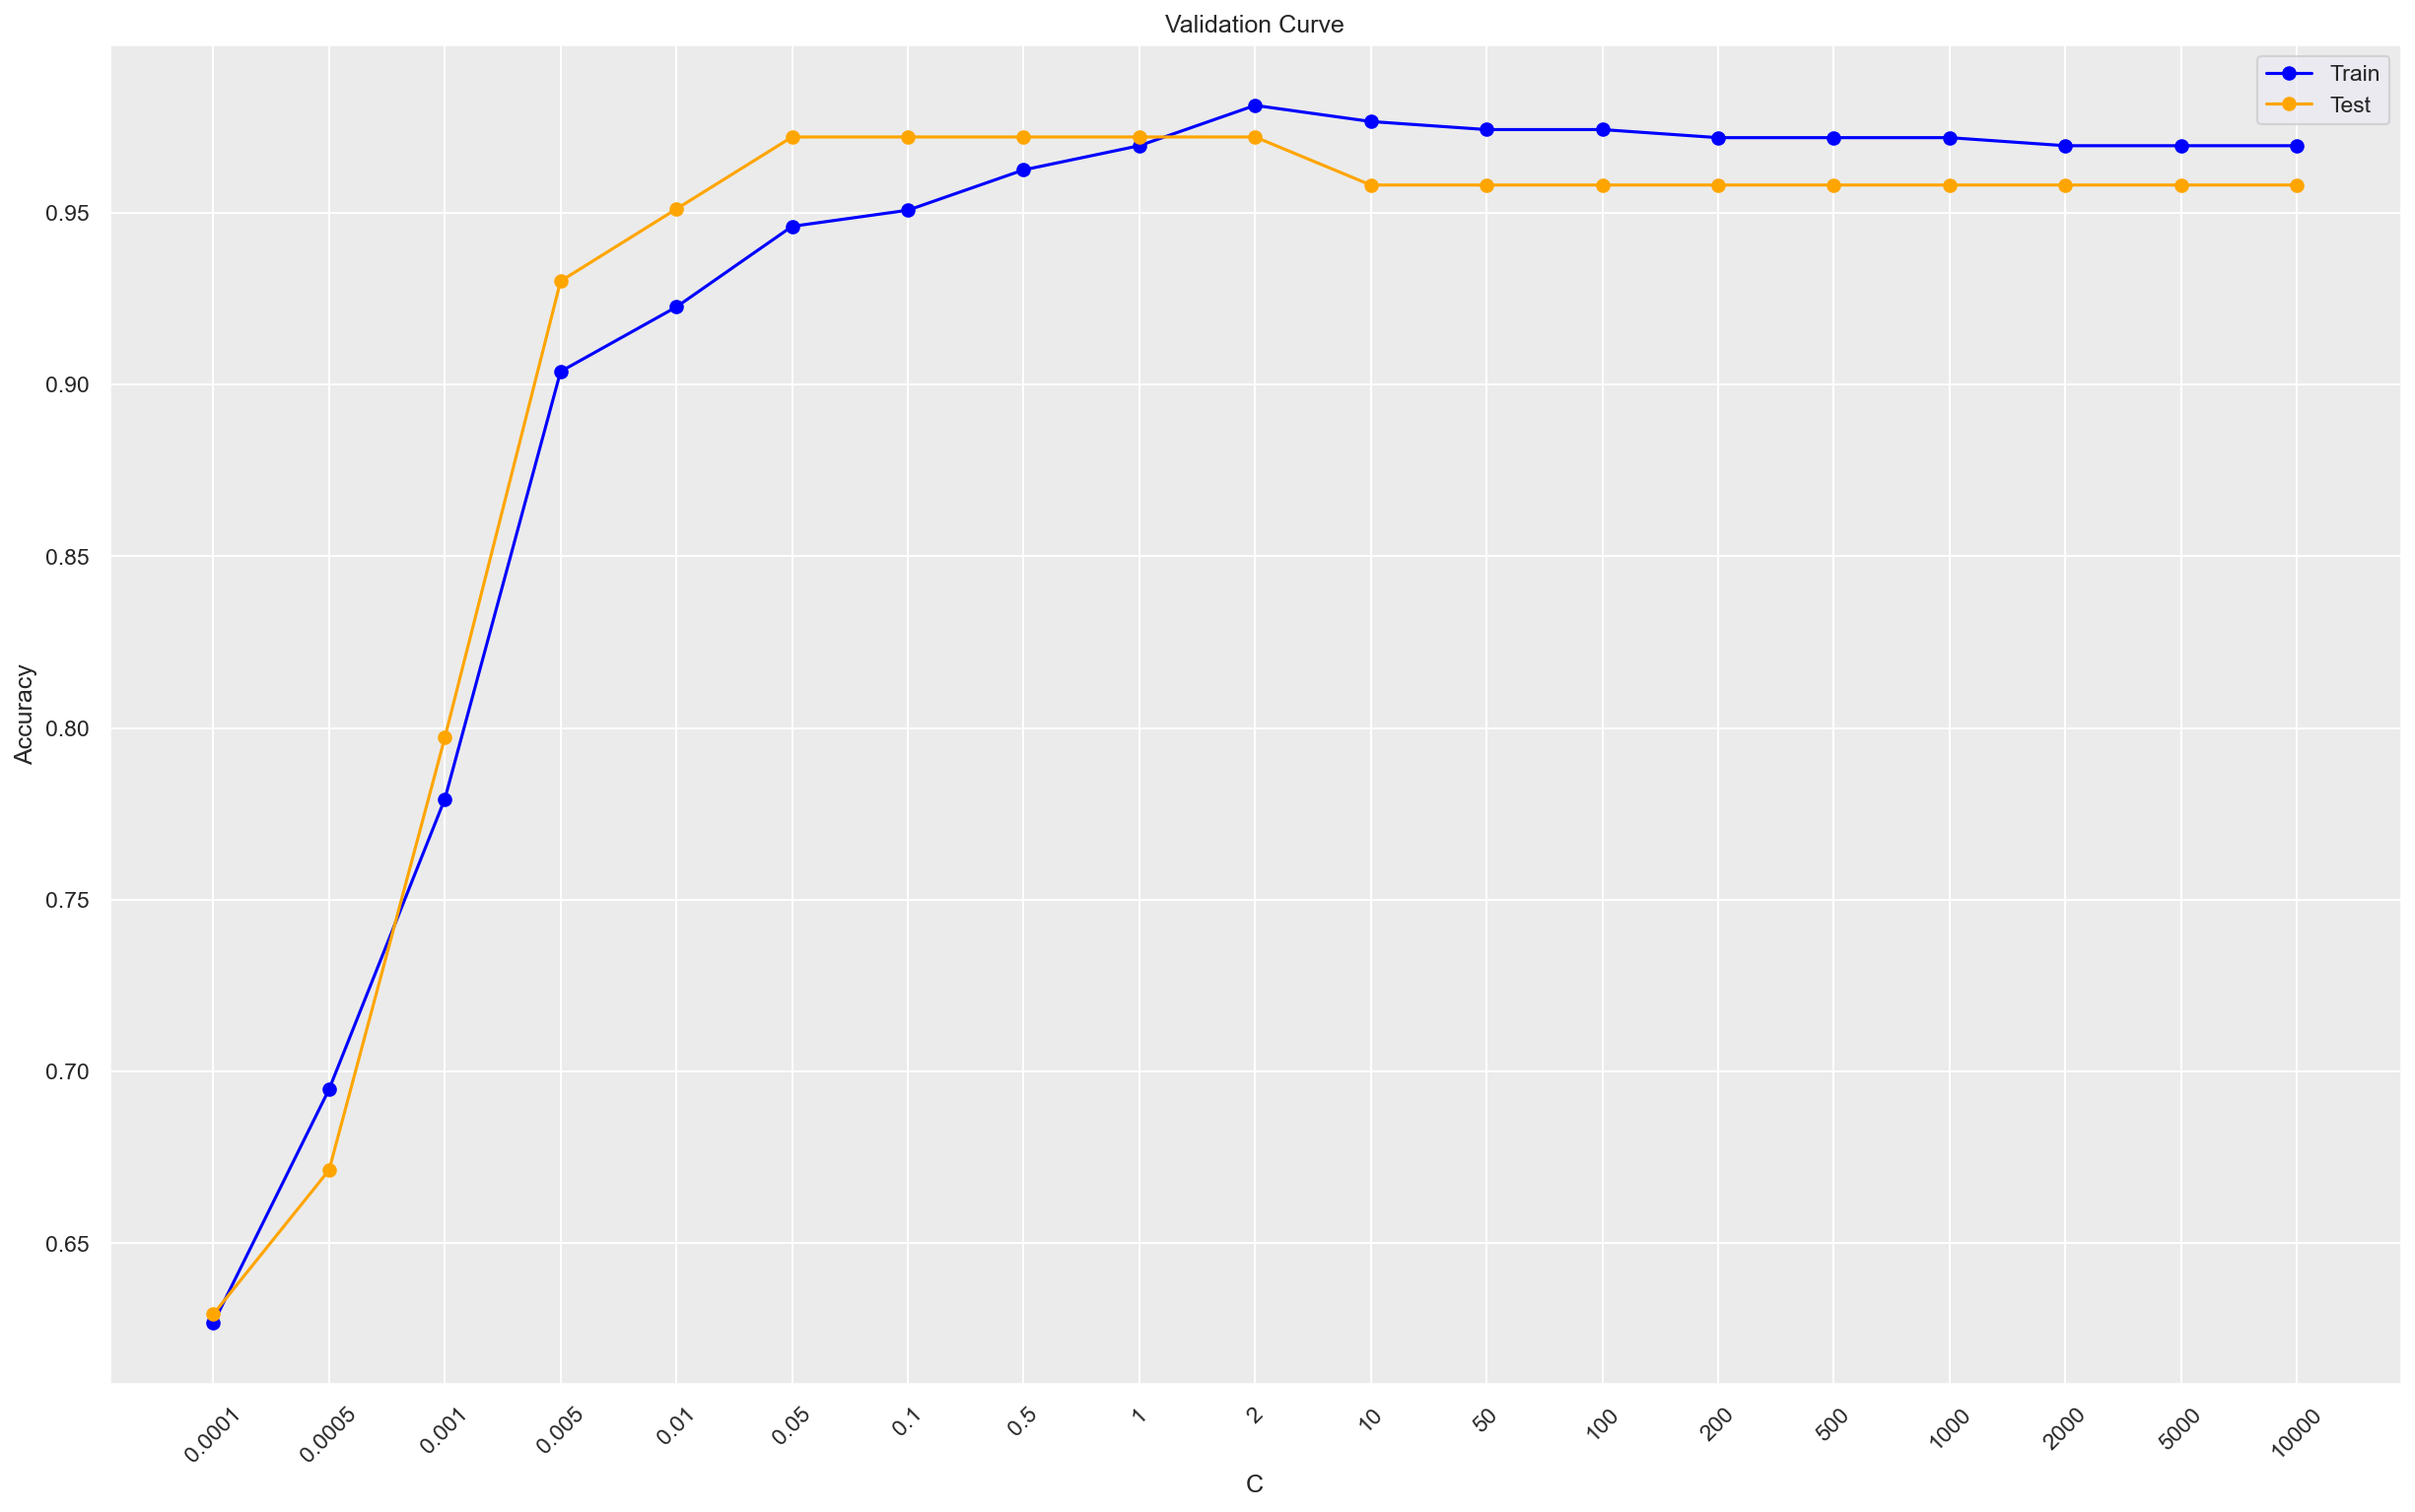

In [93]:
# Plotting the validation curve
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label='Train')
plt.plot(accuracy_test, marker='o', color='orange', label='Test')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(C_list)), labels=C_list, rotation=45)
plt.xlabel('C')
plt.ylabel('Accuracy')
ax.grid(which='minor', linewidth = 0.5)
# set the plot to a gray background like ggplot.
ax.set_facecolor('#EBEBEB')
plt.legend()
plt.show()

<p>From the validation curve above, the best value of c is 2.</p>

In [94]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=2)

# fit the model on the training set
clf.fit(X_train_nc_ss, y_train)

LogisticRegression(C=2, max_iter=10000)

In [95]:
# determine the classifier's prediction on the training set
pred_train = clf.predict(X_train_nc_ss)

In [96]:
# calculate the training accuracy scores
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.9812206572769953

In [97]:
# determine the classifier's prediction on the testing set
pred_test = clf.predict(X_test_nc_ss)

In [98]:
# calculate the testing accuracy scores 
metrics.accuracy_score(y_true=y_test, y_pred=pred_test)

0.972027972027972

<p>Our training accuracy score is higher than the testing accuracy score.</p>

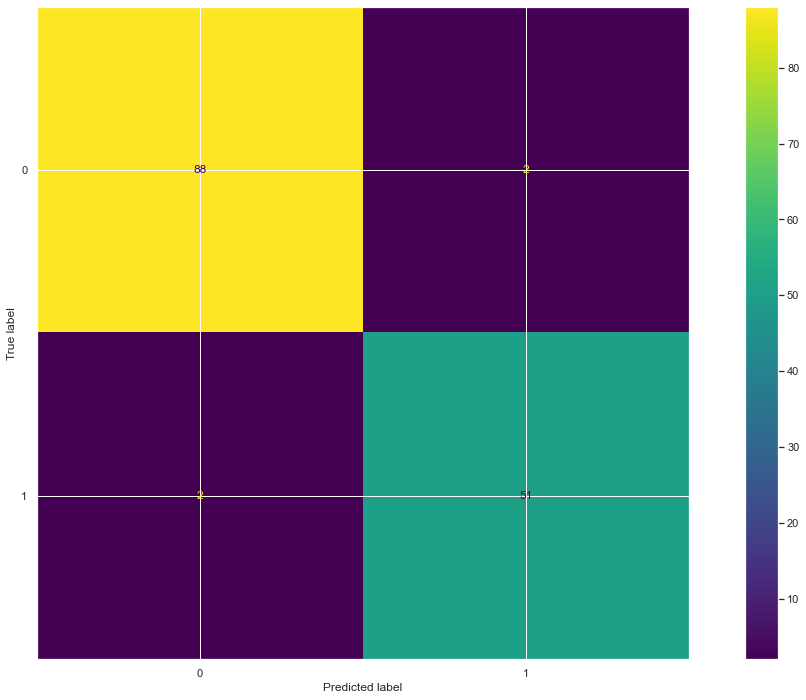

In [99]:
# derive a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=pred_test)

In [100]:
metrics.confusion_matrix(y_true=y_test, y_pred=pred_test)

array([[88,  2],
       [ 2, 51]], dtype=int64)

In [101]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



<ul>Using the classification report above, the following metrics on the testing set are:
<li>Recall is 0.96.</li>
<li>Specificity is 0.98.</li>
<li>Precision is 0.96.</li>
<li>False Positive Rate is 0.02.</li>
<li>F1 Score is 0.96.</li>
</ul>

<p>The training accuracy score is higher than the testing accuracy score when we remove the independent variables, which are highly correlated amongst each other. These scores are much better than the training and testing accuracy scores derived in Question 6 where we used all the independent variables in both training and testing sets.</p>